# load functions

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
getwd()
#load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')
dim(df_all)

[1] "C:/Users/nmishra/Desktop/Total RNAseq EMT/jupyter codes"

[1] 14577    31

# common parameters

In [2]:
f_display_sym <- FALSE
seed_geom_text_repel <- 40

#biotype_exclude <- NULL
biotype_exclude <- "pseudogene"  # current choice of fig1
#biotype_exclude <- "protein_coding|pseudogene"

#biotype_include <- NULL
biotype_include <- "protein_coding"  # current choice of fig1

fname_appendix <- ""
if (!is.null(biotype_include)) {
    fname_appendix <- sprintf("_%s", gsub("\\|", "_", biotype_include))
} 
if (!is.null(biotype_exclude)) {
    fname_appendix <- sprintf("%s_wo_%s", fname_appendix, gsub("\\|", "_", biotype_exclude))
} 

fname_appendix


[1] "_protein_coding_wo_pseudogene"

In [3]:
if (!is.null(biotype_exclude)) {
    f <- grepl(biotype_exclude, df_all$biotype)
    df_exclude <- df_all[f, ]
    show(head(df_exclude))
    show(dim(df_exclude))
    excludes <- rownames(df_exclude)
    
    sym_mrna_only <- setdiff(sym_mrna_only, excludes)
    sym_mrna_up_ribo_up <- setdiff(sym_mrna_up_ribo_up, excludes)
    sym_mrna_dn_ribo_dn <- setdiff(sym_mrna_dn_ribo_dn, excludes)
    sym_mrna_no_ribo_up <- setdiff(sym_mrna_no_ribo_up, excludes)
    sym_mrna_no_ribo_dn <- setdiff(sym_mrna_no_ribo_dn, excludes)
    sym_mrna_up_ribo_dn <- setdiff(sym_mrna_up_ribo_dn, excludes)
    sym_mrna_dn_ribo_up <- setdiff(sym_mrna_dn_ribo_up, excludes)    
}
length(sym_mrna_only);  length(sym_mrna_up_ribo_up)

              seqnames     start       end width strand         source
1810014B01Rik       10  86521389  86530670  9282      +         havana
2610005L07Rik        8  20016466  20055498 39033      +         havana
2700099C18Rik       17  95057528  95082560 25033      +         havana
2810025M15Rik        1 157239922 157247806  7885      + ensembl_havana
3000002C10Rik        9 109657011 109661774  4764      - ensembl_havana
3110053B16Rik       12  20924126  20971263 47138      -         havana
              unt.transcription tgfb.transcription tgfbCX5461.transcription
1810014B01Rik        -2.8286057         -4.4853001               -4.1425466
2610005L07Rik        -0.3642834         -0.3366501               -0.4971759
2700099C18Rik        -3.1993504         -4.2285648               -5.3041198
2810025M15Rik        -0.6030111         -0.7441168               -0.9447124
3000002C10Rik        -3.3429596         -4.1075866               -3.9474193
3110053B16Rik        -3.9591801         -3.9958

[1] 3893

[1] 864

In [4]:
if (!is.null(biotype_include)) {
    f <- grepl(biotype_include, df_all$biotype)
    df_include <- df_all[f, ]
    show(head(df_include))
    show(dim(df_include))
    include_genes <- rownames(df_include)
    
    sym_mrna_only <- intersect(sym_mrna_only, include_genes)
    sym_mrna_up_ribo_up <- intersect(sym_mrna_up_ribo_up, include_genes)
    sym_mrna_dn_ribo_dn <- intersect(sym_mrna_dn_ribo_dn, include_genes)
    sym_mrna_no_ribo_up <- intersect(sym_mrna_no_ribo_up, include_genes)
    sym_mrna_no_ribo_dn <- intersect(sym_mrna_no_ribo_dn, include_genes)
    sym_mrna_up_ribo_dn <- intersect(sym_mrna_up_ribo_dn, include_genes)
    sym_mrna_dn_ribo_up <- intersect(sym_mrna_dn_ribo_up, include_genes) 
    sym_rpf_only <- intersect(sym_ribo_only, include_genes)
}
length(sym_mrna_only); length(sym_mrna_up_ribo_up)

              seqnames    start      end width strand         source
0610009B22Rik       11 51576213 51579701  3489      - ensembl_havana
0610010F05Rik       11 23514961 23583639 68679      - ensembl_havana
0610010K14Rik       11 70126032 70128740  2709      - ensembl_havana
0610012G03Rik       16 31765868 31767312  1445      -         havana
0610030E20Rik        6 72324300 72330131  5832      + ensembl_havana
0610040J01Rik        5 63969706 64056968 87263      + ensembl_havana
              unt.transcription tgfb.transcription tgfbCX5461.transcription
0610009B22Rik        -1.7361927        -1.77777696              -1.52337076
0610010F05Rik        -0.5443124        -0.18299550              -0.57995446
0610010K14Rik        -1.0822802        -1.73978964              -1.85796767
0610012G03Rik         0.1094487         0.09824498               0.09778162
0610030E20Rik        -0.7066802        -0.89024066              -0.91363548
0610040J01Rik        -1.1236084        -4.73941679           

[1] 3845

[1] 858

# rpf_only_up_dn

In [5]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%d)", length(sym_mrna_only))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%d)", length(sym_mrna_up_ribo_up)+length(sym_mrna_dn_ribo_dn))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
f <- sym %in% sym_mrna_no_ribo_up
str_rpf_only_up <- sprintf("RPF Only - Up (n=%d)", length(sym_mrna_no_ribo_up))
df_fig[f, "fig.type"] <- str_rpf_only_up

verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_dn
str_rpf_only_dn <- sprintf("RPF Only - Down (n=%d)", length(sym_mrna_no_ribo_dn))
df_fig[f, "fig.type"] <- str_rpf_only_dn
# verb('sym_no_de_both: %d\n',length(sym_no_de_both)); f <- sym %in%
# sym_no_de_both; df_fig[f, 'fig.type'] <- 'No DE'

verb("sym_rpf_only: %d\n", length(sym_rpf_only))
f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCuntVStgfb.transcription) & 
    !is.na(df_fig$log2FCuntVStgfb.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf, str_rpf_only_up, str_rpf_only_dn))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c('RNA Only'='#aaaaaa',
              'RNA and RPF'='#7aaa3d',
              'RPF Only - Up'='#d78c5e',
              'RPF Only - Down'='#fcf050')
names(nv_color) <- levels(df_fig$fig.type)

sym_mrna_only: 3845
sym_mrna_up_ribo_up: 858
sym_mrna_dn_ribo_dn: 705
sym_mrna_no_ribo_up: 212
sym_mrna_no_ribo_dn: 339
sym_rpf_only: 551


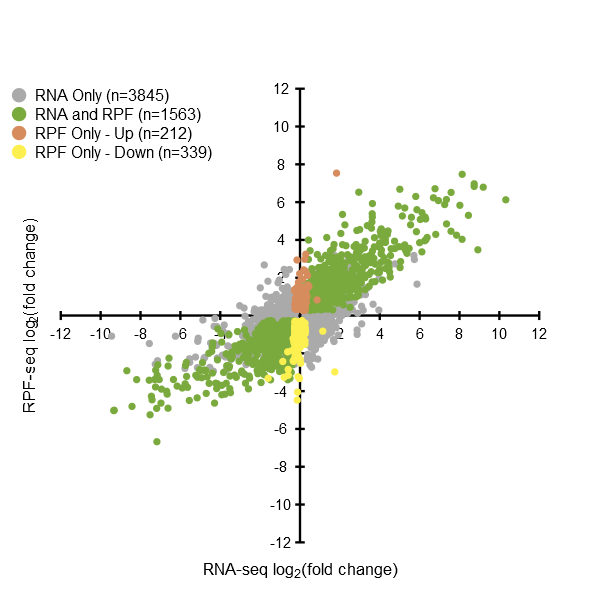

In [6]:
nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
    aes(x=log2FCuntVStgfb.transcription, 
        y=log2FCuntVStgfb.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('RNA-seq log'[2]*'(fold change)'),
                   ylab=expression('RPF-seq log'[2]*'(fold change)'),
                   labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          #legend.spacing.y = unit(0.5, "cm"),          
          legend.position = c(0.02, 0.92), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  f_sym <- grepl('Malat', df_fig$sym)
    
  th_log2fc <- log2(1.2)
  th_adj_pvalue <- 0.05
    
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCuntVStgfb.transcription > th_log2fc & df_fig$log2FCuntVStgfb.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCuntVStgfb.transcription < -th_log2fc & df_fig$log2FCuntVStgfb.translation > th_log2fc
  df_fig$sig[f_tgfb_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb_rnaseq_dn_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'

  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_dn_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4

  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)

  f <- df_fig$sig != 'no'
  if (any(f)) {
  df1 <- df_fig[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=sym, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}

print_figure(gg, width=5, height=5,
    file=sprintf("scatter_plot.fig1%s.rpf_only_up_dn", fname_appendix))


# fig1

In [7]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%s)", format(length(sym_mrna_only), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_dn: %d\n", length(sym_mrna_up_ribo_dn))
verb("sym_mrna_dn_ribo_up: %d\n", length(sym_mrna_dn_ribo_up))
f <- sym %in% sym_mrna_up_ribo_dn | sym %in% sym_mrna_dn_ribo_up
str_mrna_rpf_discord <- sprintf("RNA RPF Discord (n=%s)", format(length(sym_mrna_up_ribo_dn) + 
    length(sym_mrna_dn_ribo_up), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf_discord

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%s)", format(length(sym_mrna_up_ribo_up) + 
    length(sym_mrna_dn_ribo_dn), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_up | sym %in% sym_mrna_no_ribo_dn
str_rpf_only <- sprintf("RPF Only (n=%s)", format(length(sym_mrna_no_ribo_up) + length(sym_mrna_no_ribo_dn), 
    big.mark = ","))
df_fig[f, "fig.type"] <- str_rpf_only

f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCuntVStgfb.transcription) & 
    !is.na(df_fig$log2FCuntVStgfb.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf_discord, 
    str_mrna_rpf, str_rpf_only))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c(`RNA Only` = "#aaaaaa", `RNA RPF Discord` = "#fcf050",
              `RNA and RPF` = "#7aaa3d", `RPF Only` = "#d78c5e")
names(nv_color) <- levels(df_fig$fig.type)

sym_mrna_only: 3845
sym_mrna_up_ribo_dn: 58
sym_mrna_dn_ribo_up: 50
sym_mrna_up_ribo_up: 858
sym_mrna_dn_ribo_dn: 705
sym_mrna_no_ribo_up: 212
sym_mrna_no_ribo_dn: 339


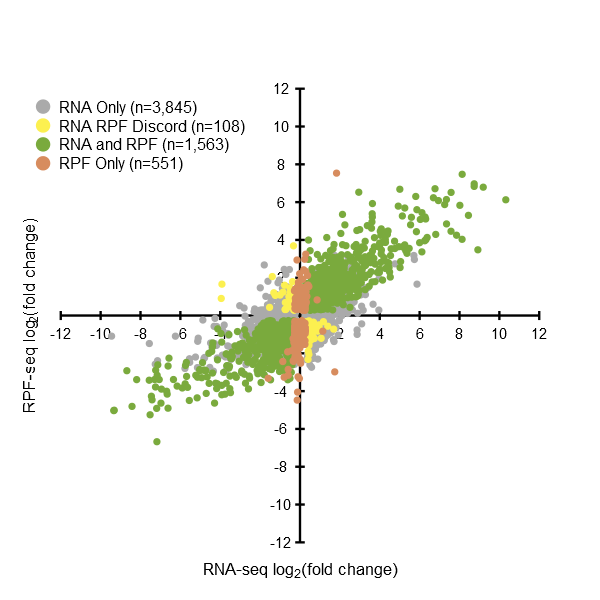

In [8]:
nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
    aes(x=log2FCuntVStgfb.transcription, 
        y=log2FCuntVStgfb.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('RNA-seq log'[2]*'(fold change)'),
                   ylab=expression('RPF-seq log'[2]*'(fold change)'),
                   labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          #legend.spacing.y = unit(0.5, "cm"),          
          legend.position = c(0.06, 0.9), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  # Snord43, Snora23, Snord83b, Snord17, Snord104  
  f_sym <- grepl('Malat|Snord43', df_fig$sym)
    
  th_log2fc <- log2(1.2)
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCuntVStgfb.transcription > th_log2fc & df_fig$log2FCuntVStgfb.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCuntVStgfb.transcription < -th_log2fc & df_fig$log2FCuntVStgfb.translation > th_log2fc
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb48_rnaseq_dn_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'

  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_dn_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4

  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)

  f <- df_fig$sig != 'no'
  if (any(f)) {
  df1 <- df_fig[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=sym, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}

print_figure(gg, width=5, height=5,
             file=sprintf("scatter_plot.fig1%s", fname_appendix))

# GO enrichment

## rna_only_up
### Developed by Nitish on 11/19/2021

<b>This approach has some pros and cons. </b><br>
<ol>
 <li>We use maximum number of genes for GO analysis as HGNC symbol was directly used.</li>
    <li>Bioconductor package <b><em>msigdbr</b></em> was used, which is using latest MSigDB in background.</li>
 <li>Make single one table/figure for each GO categories (BP, CC, MF).</li>
</ol>

In [9]:
condstr <- "sym_rna_only_up"

sym_rna_only_up <- intersect(sym_mrna_only, sym_mrna_up)
verb("sym_rna_only_up: %d\n", length(sym_rna_only_up))

sym_rna_only_up: 1874


In [10]:
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)

#entrez.id <- unique(entrezdf$entrez_id[ match(sym_rna_only_up, entrezdf$gene_name) ])
gmt_mus.bp <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.cc <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:CC") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.mf <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:MF") %>% 
  dplyr::select(gs_name, gene_symbol)
#head(gmt_mus)
set.seed(40)
em.bp <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.bp)
em.cc <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.cc)
em.mf <- enricher(sym_rna_only_up, TERM2GENE=gmt_mus.mf)
head(em.bp)
head(em.cc)
head(em.mf)
#egmt_rna_only_up <- enrichGO(sym_rna_only_up, org.Mm.eg.db=gmt_mus, ont='all', keyType = "gene_symbol",
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
#                minGSSize = 10, maxGSSize = 500)
#egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)

write.table(em.bp, file = sprintf('table/fig1.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.cc, file = sprintf('table/fig1.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.mf, file = sprintf('table/fig1.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )



Warning message:
"package 'DOSE' was built under R version 4.1.2"
DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Warning message:
"package 'msigdbr' was built under R version 4.1.2"


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_GLYCOPROTEIN_BIOSYNTHETIC_PROCESS,GOBP_GLYCOPROTEIN_BIOSYNTHETIC_PROCESS,GOBP_GLYCOPROTEIN_BIOSYNTHETIC_PROCESS,74/1649,329/16223,3.188439e-11,8.128975e-08,7.656401e-08,Aatf/Abca2/Ago2/Alg1/Alg14/Alg5/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/Bcl2/Bmpr2/C1galt1c1/Chpf/Chpf2/Chst11/Chst12/Chst14/Chsy1/Csgalnact1/Dad1/Dpm2/Dpy19l1/Dse/Dsel/Edem3/Eogt/Ext2/Extl3/Fkrp/Fut8/Galnt1/Galnt3/Galnt7/Glce/Gxylt1/Hs2st1/Itm2c/Large1/Man1a2/Man1b1/Man2a2/Mcfd2/Mgat2/Mgat4a/Mgat4b/Mgat5/Nagpa/Ndst1/Ndst2/Nus1/Ost4/Ostc/Plod3/Pmm1/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Psen1/Rxylt1/Srd5a3/St3gal2/St6gal1/Tmtc4/Ube2j1/Uggt1/Uggt2/Xxylt1/Xylt2,74
GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,GOBP_RESPONSE_TO_TOPOLOGICALLY_INCORRECT_PROTEIN,53/1649,200/16223,3.647734e-11,8.128975e-08,7.656401e-08,Amfr/Bak1/Bcl2l11/Bfar/Dab2ip/Daxx/Dnajb1/Dnajb11/Dnajb12/Dnajb2/Dnajb4/Dnajb5/Dnajb9/Dnajc3/Edem1/Edem3/Ern1/Erp44/Extl3/Ficd/Fkbp14/Gosr2/Herpud2/Hsf1/Hspa1b/Hspa5/Hyou1/Kdelr3/Klhdc3/Lmna/Mbtps1/Mfn2/Nck1/Nck2/Pomt2/Ppp1r15a/Ppp2r5b/Rhbdd1/Rnf185/Selenos/Serpinh1/Srpr/Tatdn2/Tmed2/Tmem129/Tmtc4/Tor1b/Tpp1/Ube2w/Uggt1/Uggt2/Wfs1/Wipi1,53
GOBP_MACROAUTOPHAGY,GOBP_MACROAUTOPHAGY,GOBP_MACROAUTOPHAGY,68/1649,306/16223,3.506078e-10,5.208863e-07,4.906049e-07,Atg13/Atg14/Atg16l1/Atp6v0a2/Atp6v0b/Atp6v0e/Atp6v1c1/Atp6v1d/Atp6v1g1/C9orf72/Capns1/Cdc37/Cdk5/Chmp3/Ern1/Exoc8/Fez2/Gabarap/Gba/Gpsm1/Hgs/Htra2/Htt/Ift20/Lamp2/Lamtor3/Lix1l/Map1lc3a/Map1lc3b/Mcoln1/Mfn2/Pacs2/Pafah1b2/Pgam5/Phf23/Pik3ca/Pip4k2b/Prkab2/Prkag2/Psen1/Rab23/Rab43/Rab7/Ralb/Retreg1/Rnf41/Rraga/Rragc/Rubcn/Scoc/Smcr8/Snapin/Snx14/Snx32/Src/Tbc1d12/Tex264/Tigar/Tmem39a/Tomm5/Trp53inp2/Uba5/Ufm1/Vmp1/Vps37a/Wdfy3/Wipi1/Zfyve1,68
GOBP_GLYCOSYLATION,GOBP_GLYCOSYLATION,GOBP_GLYCOSYLATION,59/1649,251/16223,5.290690e-10,5.895151e-07,5.552440e-07,Abca2/Alg1/Alg14/Alg5/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/C1galt1c1/Cln5/Dad1/Dpm2/Dpy19l1/Edem3/Eogt/Ext2/Extl3/Fkrp/Fut8/Galnt1/Galnt3/Galnt7/Gba/Gba2/Gxylt1/Large1/Man1a2/Man1b1/Man2a2/Mcfd2/Mgat2/Mgat4a/Mgat4b/Mgat5/Nagpa/Nus1/Ost4/Ostc/Pigm/Plod3/Pmm1/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Psen1/Rxylt1/Srd5a3/St3gal2/St6gal1/Tmtc4/Ube2j1/Uggt1/Uggt2/Xxylt1,59
GOBP_RETROGRADE_TRANSPORT_ENDOSOME_TO_GOLGI,GOBP_RETROGRADE_TRANSPORT_ENDOSOME_TO_GOLGI,GOBP_RETROGRADE_TRANSPORT_ENDOSOME_TO_GOLGI,29/1649,83/16223,1.035246e-09,8.464505e-07,7.972425e-07,Arl1/Bet1l/Cln5/Dennd5a/Erc1/Gosr1/Gosr2/Prepl/Rab29/Rab6b/Rab7/Rab9/Rgp1/Ric1/Sgsm2/Slc66a2/Snx12/Snx32/Spag9/Stx16/Stx6/Tbc1d10b/Tmem87b/Ube2o/Vps29/Vti1a/Vti1b/Washc2/Ykt6,29
GOBP_GLYCOPROTEIN_METABOLIC_PROCESS,GOBP_GLYCOPROTEIN_METABOLIC_PROCESS,GOBP_GLYCOPROTEIN_METABOLIC_PROCESS,81/1649,402/16223,1.139489e-09,8.464505e-07,7.972425e-07,Aatf/Abca2/Ago2/Alg1/Alg14/Alg5/Amfr/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/Bcl2/Bmpr2/C1galt1c1/Chpf/Chpf2/Chst11/Chst12/Chst14/Chsy1/Csgalnact1/Dad1/Dpm2/Dpy19l1/Dse/Dsel/Edem1/Edem3/Eogt/Erp44/Ext2/Extl3/Fkrp/Fut8/Galnt1/Galnt3/Galnt7/Glce/Gxylt1/Hs2st1/Itm2c/Large1/Man1a2/Man1b1/Man2a2/Mcfd2/Mgat2/Mgat4a/Mgat4b/Mgat5/Nagpa/Ndst1/Ndst2/Nus1/Ost4/Ostc/Plod3/Pmm1/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Porcn/Ppard/Psen1/Rnf139/Rnf185/Rxylt1/Srd5a3/St3gal2/St6gal1/Tmtc4/Ube2j1/Uggt1/Uggt2/Xxylt1/Xylt2,81


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_GOLGI_STACK,GOCC_GOLGI_STACK,GOCC_GOLGI_STACK,39/1420,129/13139,1.228550e-09,6.732453e-07,6.103953e-07,B3galt6/B4galt3/B4galt7/Bet1/Bet1l/Chpf/Chpf2/Chsy1/Csgalnact1/Dnmbp/Fut8/Galnt1/Galnt3/Golga7/Golgb1/Golim4/Gosr1/Mbtps1/Mgat2/Mgat4a/Mgat4b/Mob4/Nagpa/Nucb1/Ocrl/Pitpnm1/Rab34/Sgms1/Slc10a7/St3gal2/St6gal1/Stx16/Tmed2/Tmed3/Tmem115/Uso1/Uxs1/Vcpip1/Zfyve1,39
GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,GOCC_VACUOLAR_MEMBRANE,85/1420,428/13139,1.507646e-08,4.130951e-06,3.745311e-06,Abca2/Acp2/Ahnak/Ap1s2/Ap3m1/Atg14/Atg16l1/Atp11a/Atp11b/Atp6ap2/Atp6v0a2/Atp6v0b/Atp6v1c1/Atp6v1d/Atp6v1g1/Borcs6/Cd1d1/Cd68/Clcn4/Clcn7/Cln5/Cpne1/Ctsa/Ctsd/Entpd4/Flcn/Fnip2/Gabarap/Gba/Gdap2/Gnaq/Gpr137/Gpr137b/Hgsnat/Itm2c/Lamp2/Lamtor3/Laptm4a/Lnpep/M6pr/Map1lc3a/Map1lc3b/Marchf2/Marchf8/Mcoln1/Mfsd12/Napa/Neu1/Ostm1/Pi4k2a/Pip4p2/Pld3/Plekhf1/Psen1/Rab12/Rab7/Rap1b/Rmc1/Rraga/Rragc/Scarb1/Scarb2/Slc15a4/Slc29a3/Slc35f6/Slc49a4/Slc66a1/Snapin/Snx14/Spag9/Sppl2a/Stard3nl/Stk11ip/Stx8/Tex264/Tmem138/Tmem175/Tmem30a/Tom1/Vmp1/Vti1b/Wdfy3/Wdr59/Wipi1/Zfyve26,85
GOCC_LAMELLIPODIUM,GOCC_LAMELLIPODIUM,GOCC_LAMELLIPODIUM,48/1420,195/13139,2.930968e-08,5.353901e-06,4.854094e-06,Abi1/Abitram/Actg2/Actr2/Ajuba/Apc/App/Arpc3/Arpc5/Cdc42bpb/Cdk5/Cfl1/Coro1b/Ctnnd1/Cttn/Dnm2/Dock8/Enah/Fam89b/Fgd1/Fgd6/Inppl1/Itgb1bp1/Limk1/Nme2/Nrbp1/Parva/Parvb/Pik3ca/Pip5k1a/Pkd2/Plekhh2/Podxl/Ppp1r9b/Ptk2b/Ptpn13/Ptprm/Rock1/Scyl3/Sh3rf1/Slc39a6/Slc9a1/Ssh1/Stx2/Stx4a/Swap70/Tiam2/Vasp,48
GOCC_INTRINSIC_COMPONENT_OF_GOLGI_MEMBRANE,GOCC_INTRINSIC_COMPONENT_OF_GOLGI_MEMBRANE,GOCC_INTRINSIC_COMPONENT_OF_GOLGI_MEMBRANE,23/1420,65/13139,1.273388e-07,1.744542e-05,1.581682e-05,B4gat1/Bet1/Bet1l/Chst12/Csgalnact1/Entpd4/Furin/Golga7/Ier3ip1/Large1/Pcsk7/Sgms1/Sgms2/Slc35a2/Slc35b1/Slc35b4/Slc39a13/Tbc1d20/Tex261/Tvp23b/Unc50/Yif1b/Zdhhc20,23
GOCC_GOLGI_CISTERNA,GOCC_GOLGI_CISTERNA,GOCC_GOLGI_CISTERNA,28/1420,97/13139,7.510463e-07,8.231467e-05,7.463028e-05,B3galt6/B4galt3/B4galt7/Bet1/Bet1l/Chpf/Chpf2/Chsy1/Csgalnact1/Fut8/Galnt1/Galnt3/Golim4/Gosr1/Mob4/Nagpa/Nucb1/Pitpnm1/Rab34/Sgms1/Slc10a7/St3gal2/St6gal1/Stx16/Tmed2/Tmed3/Tmem115/Uxs1,28
GOCC_CIS_GOLGI_NETWORK,GOCC_CIS_GOLGI_NETWORK,GOCC_CIS_GOLGI_NETWORK,18/1420,49/13139,1.575047e-06,1.438543e-04,1.304249e-04,Angel1/B3gat3/Golgb1/Golim4/Gosr1/Hook3/Ift20/Kdelr3/Lrpap1/Map6/Nucb1/Phtf1/Rab29/Retreg1/Slc10a7/Tmed10/Tmed5/Trappc3,18


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,GOMF_NUCLEOSIDE_TRIPHOSPHATASE_REGULATOR_ACTIVITY,93/1515,479/14695,1.000856e-09,8.977676e-07,8.185947e-07,Acap3/Agap1/Agap3/Arfgap3/Arhgap10/Arhgap17/Arhgap27/Arhgap35/Arhgap39/Arhgef10/Arhgef2/Arhgef25/Arhgef40/Asap1/Atp1b3/Bag2/Bnip2/C9orf72/Cdc42ep2/Cdc42se1/Chn1/Cpeb2/Cyth3/Cyth4/Dab2ip/Dennd1a/Dennd4a/Dennd5a/Dnajb1/Dnajb2/Dnajb4/Dnajb6/Dnajc1/Dnm1l/Dnmbp/Dock6/Dock8/Eif2b2/Elmo1/Farp1/Farp2/Fgd1/Fgd6/Flcn/Fnip2/Garnl3/Git1/Gnaq/Gpsm1/Hyou1/Iqgap1/Iqsec1/Itgb1bp1/Katnb1/Lamtor3/Myo9a/Nucb1/Nucb2/Ocrl/Pgam5/Rabep2/Rabgap1l/Rap1gds1/Rapgef1/Rasal2/Rasgrp3/Rgp1/Rgs10/Rgs3/Ric1/Ric8a/Rin1/Rin2/Rin3/Sbf1/Sgsm2/Sgsm3/Sh3bp4/Sh3bp5l/Sipa1l1/Smap1/Smcr8/Sos1/Syde1/Tbc1d10b/Tbc1d12/Tbc1d13/Tbc1d16/Tbc1d2/Tbc1d20/Tbc1d2b/Tiam2/Vav2,93
GOMF_UBIQUITIN_LIKE_PROTEIN_TRANSFERASE_ACTIVITY,GOMF_UBIQUITIN_LIKE_PROTEIN_TRANSFERASE_ACTIVITY,GOMF_UBIQUITIN_LIKE_PROTEIN_TRANSFERASE_ACTIVITY,81/1515,427/14695,3.598542e-08,1.613946e-05,1.471614e-05,8030462N17Rik/Amfr/Arel1/Arih1/Atg16l1/Bfar/Birc3/Brap/Cbx4/Cdc34/Chfr/Cnot4/Cul4a/Dtx2/Dtx3/Egr2/Fbxl3/Fbxo9/Fbxw2/Hdac4/Hectd3/Hectd4/Klhl20/Klhl21/Maea/Marchf2/Marchf3/Marchf8/Med10/Mib1/Mib2/Nhlrc3/Nosip/Pias4/Rc3h1/Rlim/Rmnd5b/Rnf11/Rnf111/Rnf139/Rnf14/Rnf145/Rnf146/Rnf185/Rnf19a/Rnf24/Rnf34/Rnf4/Rnf41/Sh3rf1/Siah1a/Siah2/Smurf2/Tmem129/Tnfaip1/Topors/Traf3ip2/Traf6/Traf7/Trim12c/Trim26/Trim32/Trim35/Trim39/Trim41/Tspan17/Ube2b/Ube2cbp/Ube2d2a/Ube2e2/Ube2f/Ube2g2/Ube2j1/Ube2o/Ube2q1/Ube2w/Ube2z/Wwp2/Zfp451/Znrf1/Znrf3,81
GOMF_SH3_DOMAIN_BINDING,GOMF_SH3_DOMAIN_BINDING,GOMF_SH3_DOMAIN_BINDING,33/1515,126/14695,3.258345e-07,9.742452e-05,8.883278e-05,Abi1/Adam10/Arhgap17/Arhgap27/Ccdc6/Crk/Cyba/Dab2ip/Dennd1a/Dnm2/Elmo1/Elmo2/Enah/Fut8/Gpx1/Grb2/Inppl1/Khdrbs3/Lyn/Nckipsd/Ostf1/Ptpn12/Rapgef1/Reps1/Sh3bgrl/Sh3bgrl2/Sh3kbp1/Socs7/Sos1/Synj2/Vasp/Wipf1/Zfp106,33
GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_GLYCOSYL_GROUPS,GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_GLYCOSYL_GROUPS,GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_GLYCOSYL_GROUPS,53/1515,257/14695,6.023952e-07,1.350871e-04,1.231740e-04,Alg1/Alg5/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/C1galt1c1/Chpf/Chpf2/Chsy1/Csgalnact1/Dpy19l1/Eogt/Ext2/Extl3/Fut8/Galnt1/Galnt3/Galnt7/Gba/Gba2/Glt8d1/Gxylt1/Large1/Mgat2/Mgat4a/Mgat4b/Mgat5/Ostc/Parp10/Parp8/Parp9/Pigc/Pigm/Plod3/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Qtrt2/Rxylt1/St3gal2/St6gal1/Tmtc4/Ugcg/Uggt1/Uggt2/Xxylt1/Xylt2,53
GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_HEXOSYL_GROUPS,GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_HEXOSYL_GROUPS,GOMF_TRANSFERASE_ACTIVITY_TRANSFERRING_HEXOSYL_GROUPS,42/1515,188/14695,9.957084e-07,1.786301e-04,1.628769e-04,Alg1/Alg5/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/C1galt1c1/Chpf/Chpf2/Chsy1/Csgalnact1/Dpy19l1/Eogt/Ext2/Extl3/Fut8/Galnt1/Galnt3/Galnt7/Gba/Gba2/Large1/Mgat2/Mgat4a/Mgat4b/Mgat5/Ostc/Pigc/Pigm/Plod3/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Tmtc4/Ugcg/Uggt1/Uggt2,42
GOMF_UDP_GLYCOSYLTRANSFERASE_ACTIVITY,GOMF_UDP_GLYCOSYLTRANSFERASE_ACTIVITY,GOMF_UDP_GLYCOSYLTRANSFERASE_ACTIVITY,34/1515,140/14695,1.451868e-06,2.170542e-04,1.979125e-04,Alg5/B3galnt2/B3galt6/B3gat3/B3glct/B4galt3/B4galt7/B4gat1/Chpf/Chpf2/Chsy1/Csgalnact1/Eogt/Ext2/Extl3/Galnt1/Galnt3/Galnt7/Gxylt1/Large1/Mgat2/Mgat4a/Mgat4b/Mgat5/Pigc/Plod3/Poglut1/Poglut3/Rxylt1/Ugcg/Uggt1/Uggt2/Xxylt1/Xylt2,34


### dotplot

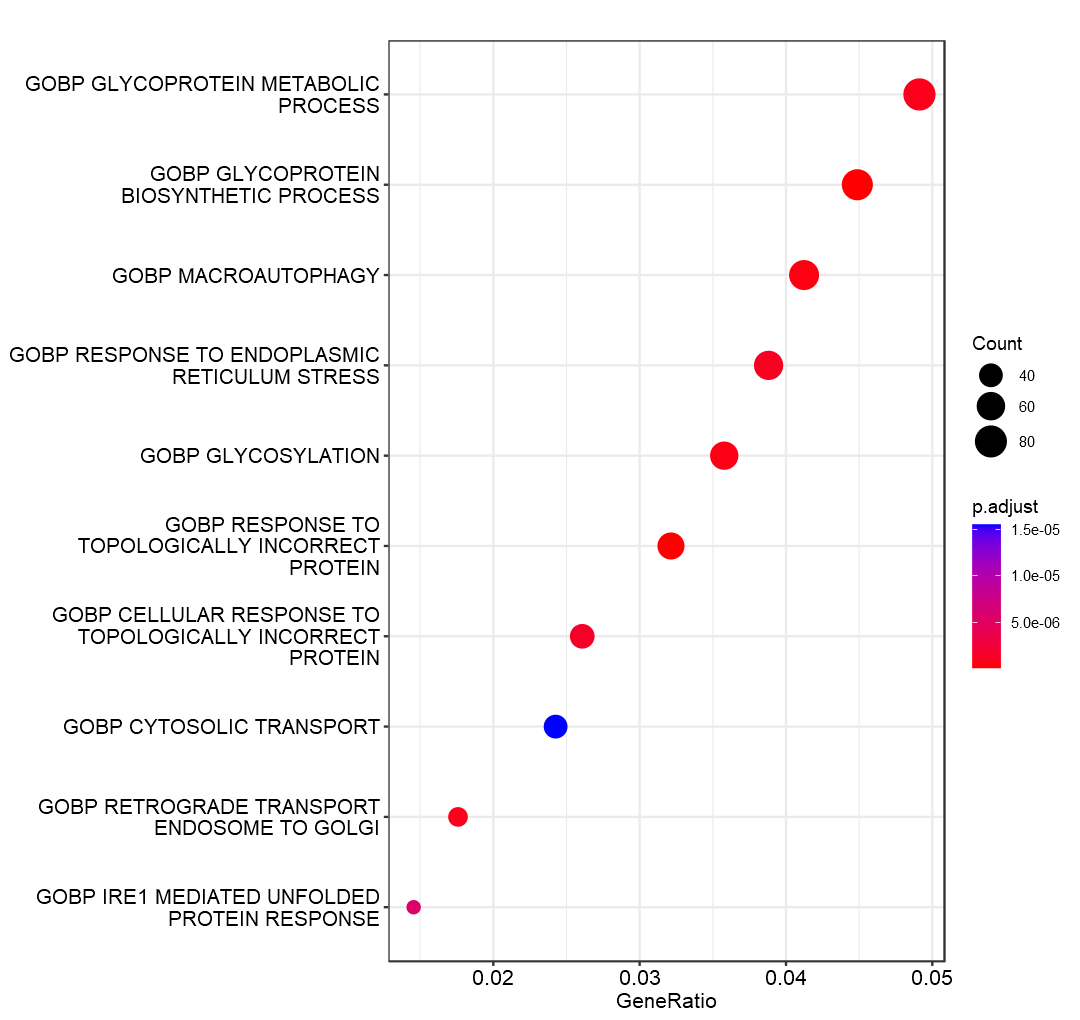

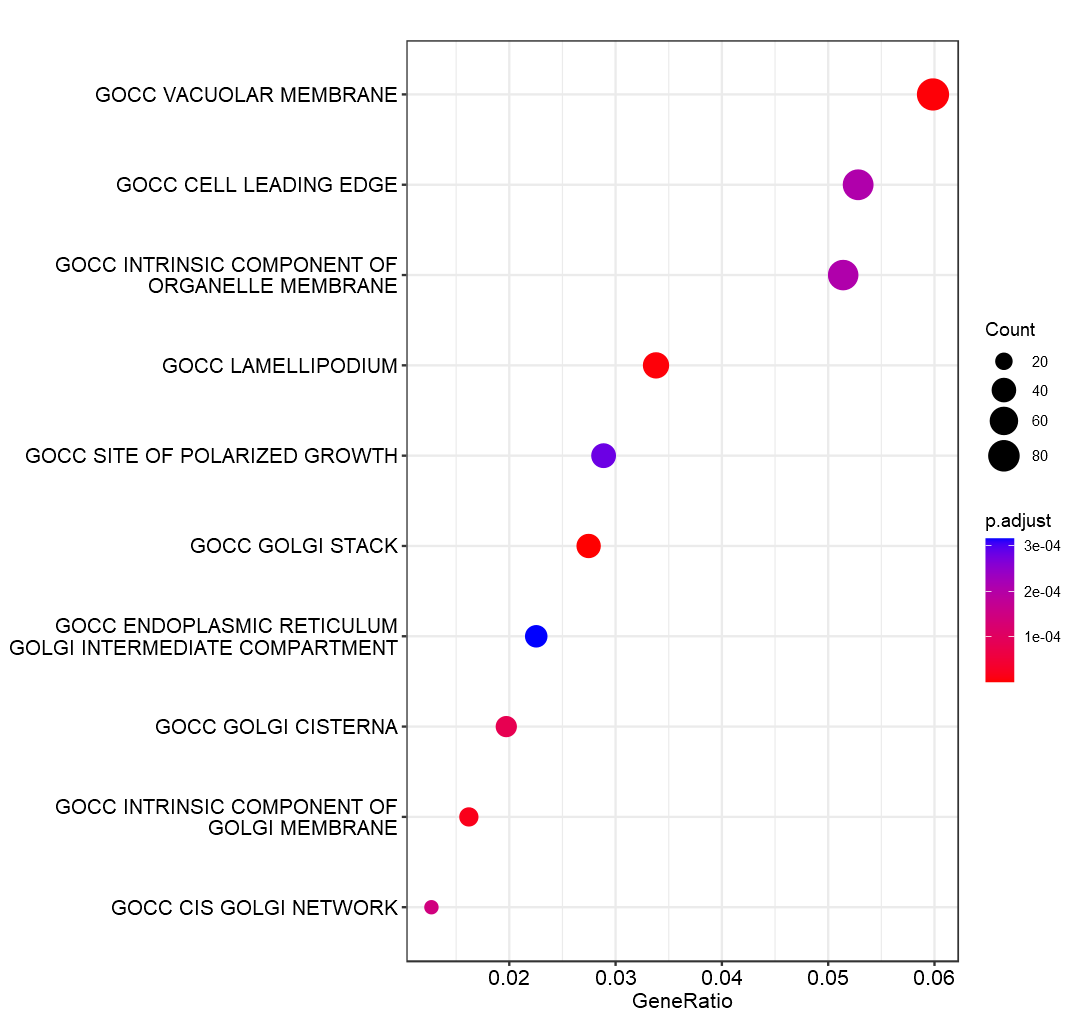

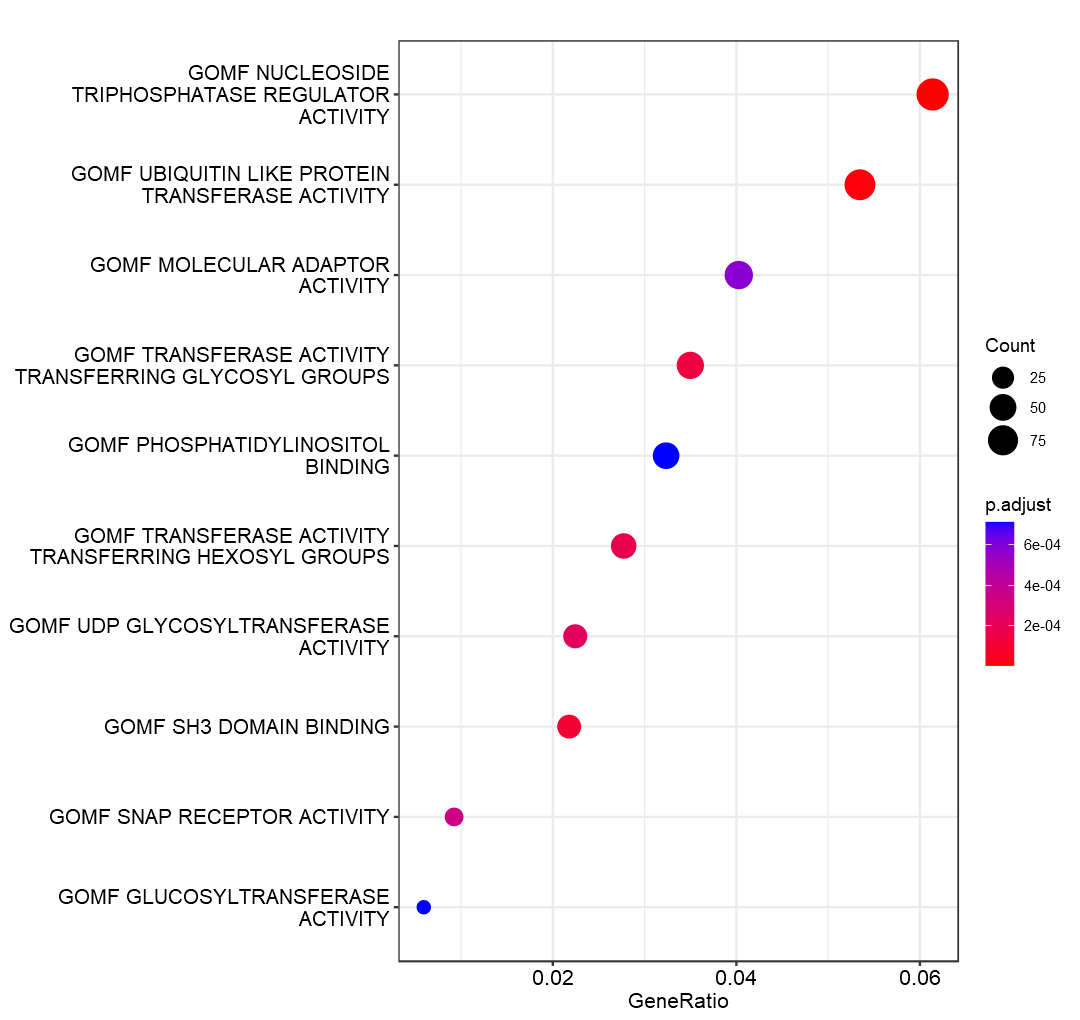

In [11]:
n_top_egmt <- 10
gg <- dotplot(em.bp, showCategory=n_top_egmt)
#gg <- dotplot(em, x = "GeneRatio",
#        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
#        title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_BP%d", condstr, n_top_egmt))


gg <- dotplot(em.cc, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_CC%d", condstr, n_top_egmt))

gg <- dotplot(em.mf, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_MF%d", condstr, n_top_egmt))

## rna_only_dn

In [12]:
condstr <- "sym_rna_only_dn"

sym_rna_only_dn <- intersect(sym_mrna_only, sym_mrna_dn)
verb("sym_rna_only_dn: %d\n", length(sym_rna_only_dn))

sym_rna_only_dn: 1971


In [13]:
library(clusterProfiler)
library(DOSE)

gmt_mus.bp <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.cc <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:CC") %>% 
  dplyr::select(gs_name, gene_symbol)

gmt_mus.mf <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:MF") %>% 
  dplyr::select(gs_name, gene_symbol)
#head(gmt_mus)
set.seed(40)
em.bp <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.bp)
em.cc <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.cc)
em.mf <- enricher(sym_rna_only_dn, TERM2GENE=gmt_mus.mf)
head(em.bp)
head(em.cc)
head(em.mf)
#egmt_rna_only_up <- enrichGO(sym_rna_only_up, org.Mm.eg.db=gmt_mus, ont='all', keyType = "gene_symbol",
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
#                minGSSize = 10, maxGSSize = 500)
#egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(egmt_rna_only_up)
#dim(egmt_rna_only_up)

write.table(em.bp, file = sprintf('table/fig1.%s.go.bp.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.cc, file = sprintf('table/fig1.%s.go.cc.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


write.table(em.mf, file = sprintf('table/fig1.%s.go.mf.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,GOBP_DNA_CONFORMATION_CHANGE,107/1766,325/16223,3.440406e-27,1.527884e-23,1.394270e-23,Acin1/Aifm1/Anp32b/Asf1b/Blm/Brip1/Cdca5/Cdkn2a/Cenpa/Cenpi/Cenpl/Cenpv/Cenpx/Chaf1a/Chaf1b/Chd2/Chd9/Chtf18/Ctcf/Ddx1/Ddx11/Dhx9/Dna2/Dnmt1/Dscc1/Ercc6l/Gtf2h2/Gtf2h4/H1f1/H1f2/H1f3/H1f4/H1f5/H2ax/H2bc12/H2bc13/H2bc14/H2bc21/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hat1/Helb/Hells/Helq/Hjurp/Hmgb1/Hmgb3/Hnrnpa2b1/Incenp/Kat6b/Knl1/Macroh2a1/Macroh2a2/Mbd3/Mcm3/Mcm5/Mcm7/Mcm8/Mis18a/Mis18bp1/Mre11a/Nasp/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Nrde2/Nusap1/Oip5/Parp1/Rad50/Rad51/Rbbp7/Recql/Recql4/Rfc2/Rfc3/Rfc4/Rfc5/Rsf1/Rtel1/Sart3/Smarcal1/Smc2/Smc4/Smchd1/Suv39h1/Top1/Top2a/Xrcc5/Xrcc6,107
GOBP_DNA_REPLICATION,GOBP_DNA_REPLICATION,GOBP_DNA_REPLICATION,95/1766,277/16223,9.279432e-26,2.060498e-22,1.880306e-22,Alyref/Atad5/Atm/Bard1/Bcl6/Blm/Brca2/Brip1/Ccna2/Cdc45/Cdk1/Cdt1/Cenpx/Chaf1a/Chaf1b/Chek1/Chek2/Chtf18/Cinp/Clspn/Ctc1/Dbf4/Ddx11/Dhx9/Dna2/Donson/Dscc1/Dtd1/Dtl/Egfr/Ehmt2/Eme1/Eme2/Esco2/Exo1/Fbxo5/Fen1/Gins1/Gins2/Gmnn/Gtpbp4/Helb/Hus1/Ing4/Lig1/Lrwd1/Mcm10/Mcm3/Mcm5/Mcm7/Mcm8/Mcmbp/Mms22l/Mre11a/Nasp/Nfia/Nucks1/Orc3/Orc5/Pclaf/Pcna/Pola1/Pola2/Pold1/Pole/Pole2/Polh/Poll/Prim2/Rad50/Rad51/Rbbp7/Rbbp8/Recql/Recql4/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rpa2/Rrm2/Rtel1/Smarcal1/Smc3/Stn1/Terf2/Ticrr/Timeless/Tipin/Tonsl/Top1/Topbp1/Usp37/Zfp365,95
GOBP_SISTER_CHROMATID_SEGREGATION,GOBP_SISTER_CHROMATID_SEGREGATION,GOBP_SISTER_CHROMATID_SEGREGATION,75/1766,189/16223,4.373243e-25,6.473858e-22,5.907715e-22,Anapc11/Anapc5/Anapc7/Atm/Aurkb/Bub1/Bub1b/Cdc20/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpf/Ctcf/Ddx11/Dlgap5/Dscc1/Dsn1/Esco2/Espl1/Fbxo5/Fen1/Haspin/Hnrnpu/Ik/Incenp/Kif18a/Kif18b/Kif22/Kif2c/Kifc1/Kifc5b/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mad2l2/Mcmbp/Mre11a/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc80/Nek2/Nek6/Nsl1/Nusap1/Pds5b/Plk1/Prc1/Psmg2/Pttg1/Racgap1/Rad21/Rad51c/Rb1/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Spdl1/Tacc3/Top2a/Trip13/Ttk/Tubg1/Ube2c/Zw10,75
GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,GOBP_MITOTIC_SISTER_CHROMATID_SEGREGATION,66/1766,160/16223,2.417024e-23,2.683501e-20,2.448827e-20,Anapc11/Anapc5/Anapc7/Atm/Aurkb/Bub1/Bub1b/Cdc20/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpf/Dlgap5/Dscc1/Dsn1/Espl1/Fbxo5/Haspin/Hnrnpu/Ik/Incenp/Kif18a/Kif18b/Kif22/Kif2c/Kifc1/Kifc5b/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mad2l2/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc80/Nek2/Nek6/Nsl1/Nusap1/Pds5b/Plk1/Prc1/Psmg2/Pttg1/Racgap1/Rad21/Rb1/Sgo1/Sgo2a/Smc1a/Smc2/Smc4/Spag5/Spdl1/Tacc3/Trip13/Ttk/Tubg1/Ube2c/Zw10,66
GOBP_CHROMOSOME_SEGREGATION,GOBP_CHROMOSOME_SEGREGATION,GOBP_CHROMOSOME_SEGREGATION,100/1766,325/16223,5.929014e-23,5.266150e-20,4.805622e-20,Anapc11/Anapc5/Anapc7/Atm/Aurkb/Birc5/Brip1/Bub1/Bub1b/Cdc20/Cdca2/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpf/Cenpx/Ciao2a/Ctcf/Ddx11/Dlgap5/Dscc1/Dsn1/Ect2/Eme1/Eme2/Esco2/Espl1/Fam83d/Fancd2/Fbxo5/Fen1/Haspin/Hjurp/Hnrnpu/Ik/Incenp/Kif18a/Kif18b/Kif22/Kif2c/Kifc1/Kifc5b/Knl1/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mad2l2/Mcmbp/Mis18a/Mki67/Mlh1/Mlh3/Mre11a/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc1/Ndc80/Nek2/Nek6/Nsl1/Nup37/Nup43/Nusap1/Oip5/Pds5b/Plk1/Pmf1/Prc1/Psmg2/Pttg1/Racgap1/Rad18/Rad21/Rad51c/Rb1/Sgo1/Sgo2a/Ska3/Smc1a/Smc2/Smc3/Smc4/Spag5/Spc25/Spdl1/Tacc3/Top1/Top2a/Trip13/Ttk/Tubg1/Ube2c/Zw10,100
GOBP_MITOTIC_NUCLEAR_DIVISION,GOBP_MITOTIC_NUCLEAR_DIVISION,GOBP_MITOTIC_NUCLEAR_DIVISION,92/1766,291/16223,4.010923e-22,2.968751e-19,2.709132e-19,Aaas/Anapc11/Anapc5/Anapc7/Anln/Atm/Aurka/Aurkb/Bmp4/Bmp7/Bub1/Bub1b/Ccnb2/Cdc14a/Cdc14b/Cdc20/Cdc25c/Cdca5/Cdca8/Cdk1/Cdk5rap2/Cdt1/Cenpe/Cenpf/Chek1/Chek2/Dlgap5/Dscc1/Dsn1/Eps8/Espl1/Fbxo5/Haspin/Hnrnpu/Ik/Incenp/Kif11/Kif18a/Kif18b/Kif20b/Kif22/Kif2c/Kifc1/Kifc5b/Knstrn/Kntc1/Lpin1/Macroh2a1/Mad2l1/Mad2l2/Mki67

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,GOCC_CHROMOSOMAL_REGION,138/1543,341/13139,5.127277e-43,2.912293e-40,2.450299e-40,Acd/Ahctf1/Alyref/Atm/Aurkb/Birc5/Blm/Brca2/Bub1/Bub1b/Cbx3/Cbx5/Cdc73/Cdca5/Cdca8/Cdk1/Cdt1/Cenpa/Cenpe/Cenpf/Cenpi/Cenpl/Cenpv/Cenpx/Chek1/Chek2/Ckap5/Clip1/Ctc1/Ctcf/Dclre1b/Dna2/Dpy30/Dscc1/Dsn1/Ercc6l/Esco2/Ezh2/Fen1/H2ax/H2bc3/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Hat1/Hells/Hjurp/Hnrnpa2b1/Hnrnpu/Incenp/Kat8/Kif18a/Kif22/Kif2c/Kmt5b/Knl1/Knstrn/Kntc1/Lrwd1/Macroh2a1/Macroh2a2/Mad2l1/Mcm3/Mcm5/Mcm7/Mis18a/Mis18bp1/Mre11a/Msh2/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nsl1/Nsmce1/Nsmce4a/Nup107/Nup133/Nup160/Nup37/Nup43/Oip5/Orc3/Orc5/Parp1/Pcna/Pds5b/Phf6/Plk1/Pmf1/Pml/Pold1/Polr2b/Ppp1cc/Ppp2r5a/Ppp2r5c/Psen2/Rad21/Rad50/Rad51/Recql4/Rpa2/Rtel1/Sgo1/Sgo2a/Ska3/Smc1a/Smc3/Smc4/Smchd1/Spag5/Spc24/Spc25/Spdl1/Spout1/Stn1/Sumo3/Suv39h1/Suv39h2/Terf2/Thoc2/Tinf2/Top2a/Ttk/Uhrf2/Wdr82/Xpo1/Xrcc5/Xrcc6/Zw10/Zwilch,138
GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,GOCC_CHROMOSOME_CENTROMERIC_REGION,83/1543,196/13139,8.452475e-28,2.400503e-25,2.019697e-25,Ahctf1/Aurkb/Birc5/Bub1/Bub1b/Cbx3/Cbx5/Cdca5/Cdca8/Cdt1/Cenpa/Cenpe/Cenpf/Cenpi/Cenpl/Cenpv/Cenpx/Ckap5/Clip1/Ctcf/Dscc1/Dsn1/Ercc6l/Esco2/Hells/Hjurp/Hnrnpu/Incenp/Kat8/Kif18a/Kif22/Kif2c/Kmt5b/Knl1/Knstrn/Kntc1/Lrwd1/Macroh2a1/Mad2l1/Mis18a/Mis18bp1/Mtbp/Ncapd2/Ncapd3/Ncapg/Ndc80/Nek2/Nsl1/Nup107/Nup133/Nup160/Nup37/Nup43/Oip5/Pds5b/Phf6/Plk1/Pmf1/Ppp1cc/Ppp2r5a/Ppp2r5c/Psen2/Rad21/Sgo1/Sgo2a/Ska3/Smc1a/Smc3/Smc4/Spag5/Spc24/Spc25/Spdl1/Spout1/Sumo3/Suv39h1/Suv39h2/Top2a/Ttk/Uhrf2/Xpo1/Zw10/Zwilch,83
GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,GOCC_PROTEIN_DNA_COMPLEX,80/1543,191/13139,1.901680e-26,3.600514e-24,3.029343e-24,Acd/Cdc45/Cdc5l/Cenpa/Ctc1/Donson/Ep300/Ercc5/Gins1/Gins2/Glyr1/H1f1/H1f2/H1f3/H1f4/H1f5/H2ac10/H2ac12/H2ac13/H2ac15/H2ac18/H2ac21/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2aj/H2aw/H2ax/H2az2/H2bc12/H2bc13/H2bc14/H2bc21/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Helb/Kat6b/Kdm1b/Macroh2a1/Macroh2a2/Mcm3/Mcm5/Mcm7/Nfyb/Nfyc/Orc3/Parp1/Pax2/Pcna/Plrg1/Pola1/Pola2/Pold1/Prim2/Rpa2/Smarcal1/Stn1/Tcf7l2/Terf2/Tinf2/Tonsl/Top1/Xrcc5/Xrcc6,80
GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,GOCC_DNA_PACKAGING_COMPLEX,54/1543,101/13139,1.540014e-24,2.186820e-22,1.839912e-22,Cenpa/Glyr1/H1f1/H1f2/H1f3/H1f4/H1f5/H2ac10/H2ac12/H2ac13/H2ac15/H2ac18/H2ac21/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2aj/H2aw/H2ax/H2az2/H2bc12/H2bc13/H2bc14/H2bc21/H2bc22/H2bc3/H2bc8/H3c10/H3c11/H3c2/H3c6/H3c8/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Kat6b/Kdm1b/Macroh2a1/Macroh2a2/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Smc2/Smc4,54
GOCC_NUCLEAR_CHROMOSOME,GOCC_NUCLEAR_CHROMOSOME,GOCC_NUCLEAR_CHROMOSOME,84/1543,244/13139,5.804221e-21,6.593595e-19,5.547614e-19,Actr5/Add3/Anp32e/Birc5/Blm/Brca2/Brd8/Bub1/Bub1b/Cdc5l/Cenpa/Chek1/Dhx9/Dsn1/Ercc5/Gins1/Gins2/H2ax/H3c10/H3c11/H3c6/H3c8/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Helb/Hnrnpu/Hus1/Ik/Incenp/Ing2/Ing3/Ino80c/Lrwd1/Macroh2a1/Macroh2a2/Mcm10/Mcm3/Mcm5/Mcm7/Mis18bp1/Mlh1/Mlh3/Mms22l/Ncapd2/Ndc80/Nek2/Orc3/Orc5/Pbrm1/Pcna/Plk1/Plrg1/Pmf1/Pola1/Pola2/Pold1/Pole/Pole2/Prim2/Rad21/Rad50/Rad51/Rpa2/Smarcal1/Smc1a/Smc2/Smc3/Smchd1/Spidr/Suv39h1/Tardbp/Timeless/Tipin/Tonsl/Top1/Top2a/Topbp1/Tubg1,84
GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,GOCC_CONDENSED_CHROMOSOME,77/1543,215/13139,1.716672e-20,1.625116e-18,1.367314e-18,Add3/Ahctf1/Aurkb/Birc5/Blm/Brca2/Bub1/Bub1b/Cbx3/Cdt1/Cenpa/Cenpe/Cenpf/Cenpv/Cenpx/Chek1/Ckap5/Ctcf/Ddx11/Dsn1/Ercc6l/Fancd2/H2ax/Hjurp/Hmgb1/Hnrnpu/Hus1/Incenp/Kif2c/Kmt5b/Knl1/Knstrn/Kntc1/Lrwd1/Macroh2a1/Mad2l1/Mis18bp1/Mki67/Mlh1/Mlh3/Ncapd2/Ncapd3/Ncapg/Ncaph2/Ndc80/Nek2/Nsl1/Nsmce1/Nsmce4a/Nup107/Nup133/Nup37/Nup43/Phf6/Plk1/Pmf1/Ppp1cc/Rad21/Rad50/Rad51/Sgo1/Sgo2a/Ska3/Smc1a/Smc2/Smc3/Spag5/S

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GOMF_CATALYTIC_ACTIVITY_ACTING_ON_DNA,GOMF_CATALYTIC_ACTIVITY_ACTING_ON_DNA,GOMF_CATALYTIC_ACTIVITY_ACTING_ON_DNA,55/1574,194/14695,6.434370e-12,5.520689e-09,4.863029e-09,Atad5/Blm/Brip1/Chd2/Chd9/Chtf18/Dclre1a/Dclre1b/Ddx1/Ddx11/Dhx9/Dkc1/Dna2/Dnmt1/Dscc1/Ercc5/Ercc6l/Exo1/Fan1/Fen1/Helb/Helq/Lig1/Mcm3/Mcm5/Mcm7/Mcm8/Mre11a/Nthl1/Pcna/Pola1/Pold1/Pole/Pole2/Polh/Poll/Rad50/Rad51/Rad51c/Rbbp8/Recql/Recql4/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rtel1/Tdg/Tdp1/Terf2/Top1/Top2a/Xrcc5/Xrcc6,55
GOMF_ATPASE_ACTIVITY,GOMF_ATPASE_ACTIVITY,GOMF_ATPASE_ACTIVITY,98/1574,461/14695,1.475971e-11,6.331916e-09,5.577617e-09,Abca3/Abca5/Abcb6/Abcb7/Abcc10/Abcd1/Acin1/Acsf2/Acsf3/Acsl1/Acsl3/Aqr/Atad2/Atad2b/Atad3a/Atad5/Atp13a2/Atp6v1h/Atp7a/Atp7b/Bcs1l/Blm/Brip1/Cct8/Cenpe/Chd2/Chd9/Chtf18/Clpb/Ddx1/Ddx11/Ddx20/Ddx39b/Ddx46/Ddx5/Ddx58/Dhx34/Dhx35/Dhx40/Dhx9/Dna2/Dscc1/Eif4a3/Ercc6l/Helb/Hells/Helq/Hspa14/Kif11/Kif13b/Kif15/Kif16b/Kif18a/Kif18b/Kif20a/Kif20b/Kif22/Kif2c/Kifc1/Kifc3/Kifc5b/Lonp2/Mcm3/Mcm5/Mcm7/Mcm8/Mlh1/Mlh3/Mre11a/Msh2/Msh6/Mtrex/Nsf/Pex1/Pex6/Pms1/Ptpa/Rad50/Rad51/Rad51c/Recql/Recql4/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rhobtb3/Rtel1/Smarca2/Smarcal1/Smchd1/Snrnp200/Top2a/Trip13/Xrcc5/Xrcc6/Ythdc2,98
GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,GOMF_SINGLE_STRANDED_DNA_BINDING,38/1574,115/14695,8.829629e-11,2.525274e-08,2.224447e-08,Blm/Brca2/Cdc45/Cry2/Ctc1/Ddx11/Dhx9/Ercc5/Fubp1/Hmces/Hmgb1/Hnrnpa2b1/Hnrnpu/Mapt/Mcm10/Mcm3/Mcm5/Mcm7/Mcm8/Mlh1/Msh2/Nucks1/Pcbp1/Pcbp2/Pola1/Polr2d/Rad18/Rad50/Rad51/Rbbp8/Rpa2/Smc2/Smc4/Stn1/Sub1/Tdp1/Terf2/Top1,38
GOMF_DNA_HELICASE_ACTIVITY,GOMF_DNA_HELICASE_ACTIVITY,GOMF_DNA_HELICASE_ACTIVITY,28/1574,72/14695,3.739921e-10,8.022131e-08,7.066483e-08,Blm/Brip1/Chd2/Chd9/Chtf18/Ddx11/Dhx9/Dna2/Dscc1/Ercc6l/Helb/Helq/Mcm3/Mcm5/Mcm7/Mcm8/Mre11a/Rad50/Rad51/Recql/Recql4/Rfc2/Rfc3/Rfc4/Rfc5/Rtel1/Xrcc5/Xrcc6,28
GOMF_HELICASE_ACTIVITY,GOMF_HELICASE_ACTIVITY,GOMF_HELICASE_ACTIVITY,44/1574,153/14695,4.982859e-10,8.550586e-08,7.531985e-08,Aqr/Blm/Brip1/Chd2/Chd9/Chtf18/Ddx1/Ddx11/Ddx20/Ddx39b/Ddx46/Ddx5/Ddx58/Dhx34/Dhx35/Dhx40/Dhx9/Dna2/Dscc1/Eif4a3/Ercc6l/Helb/Hells/Helq/Mcm3/Mcm5/Mcm7/Mcm8/Mre11a/Mtrex/Rad50/Rad51/Recql/Recql4/Rfc2/Rfc3/Rfc4/Rfc5/Rtel1/Smarca2/Snrnp200/Xrcc5/Xrcc6/Ythdc2,44
GOMF_SINGLE_STRANDED_DNA_HELICASE_ACTIVITY,GOMF_SINGLE_STRANDED_DNA_HELICASE_ACTIVITY,GOMF_SINGLE_STRANDED_DNA_HELICASE_ACTIVITY,13/1574,19/14695,3.400702e-09,4.863004e-07,4.283691e-07,Chtf18/Dhx9/Dna2/Dscc1/Helb/Helq/Mcm5/Mcm7/Rad51/Rfc2/Rfc3/Rfc4/Rfc5,13


## dotplot

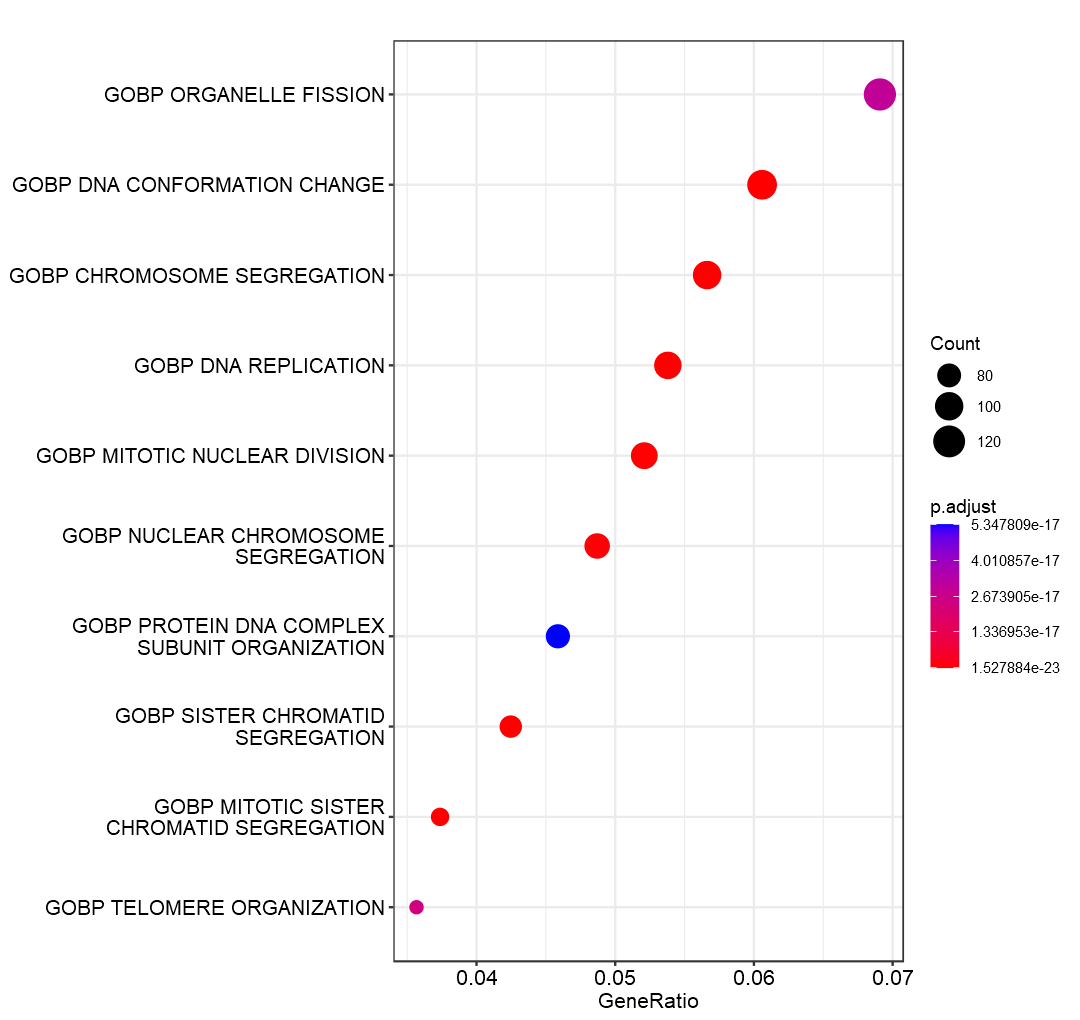

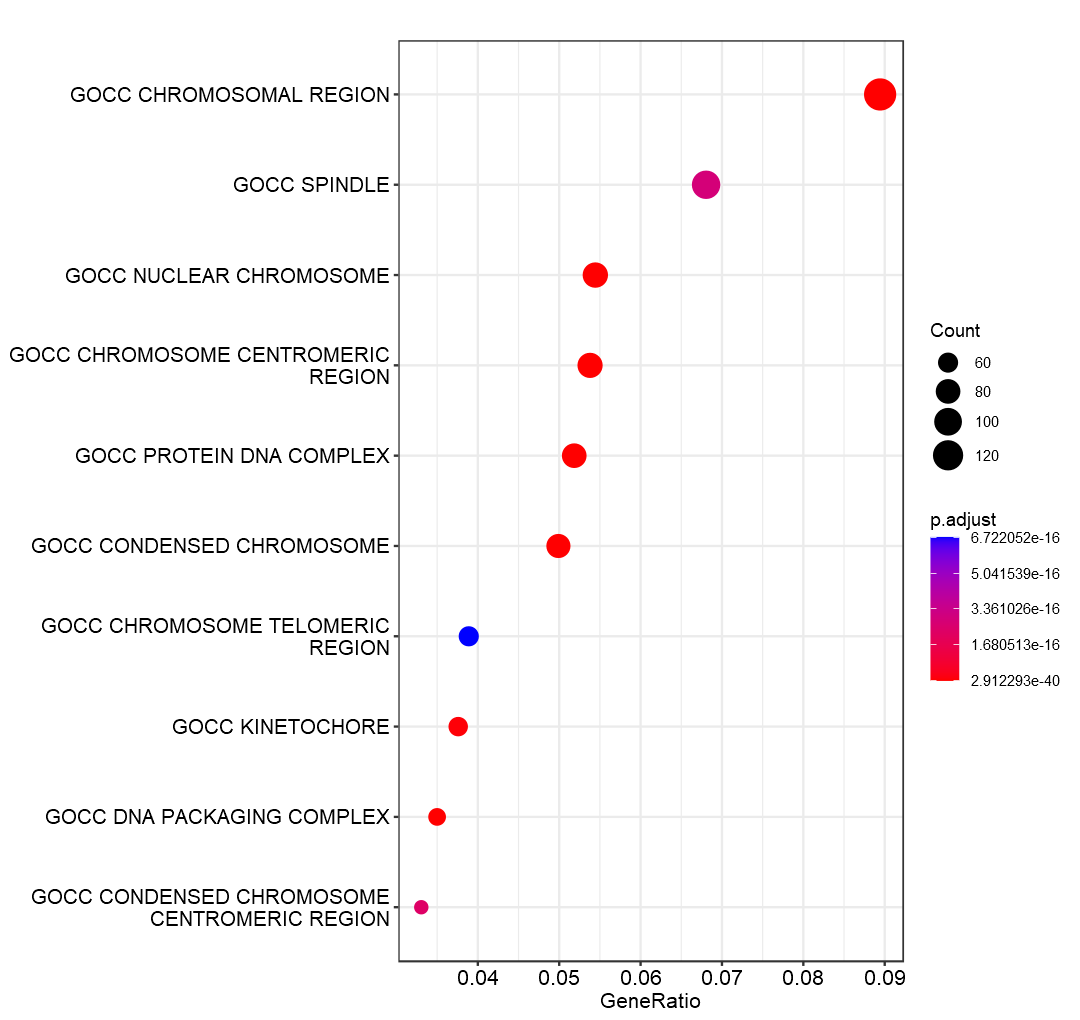

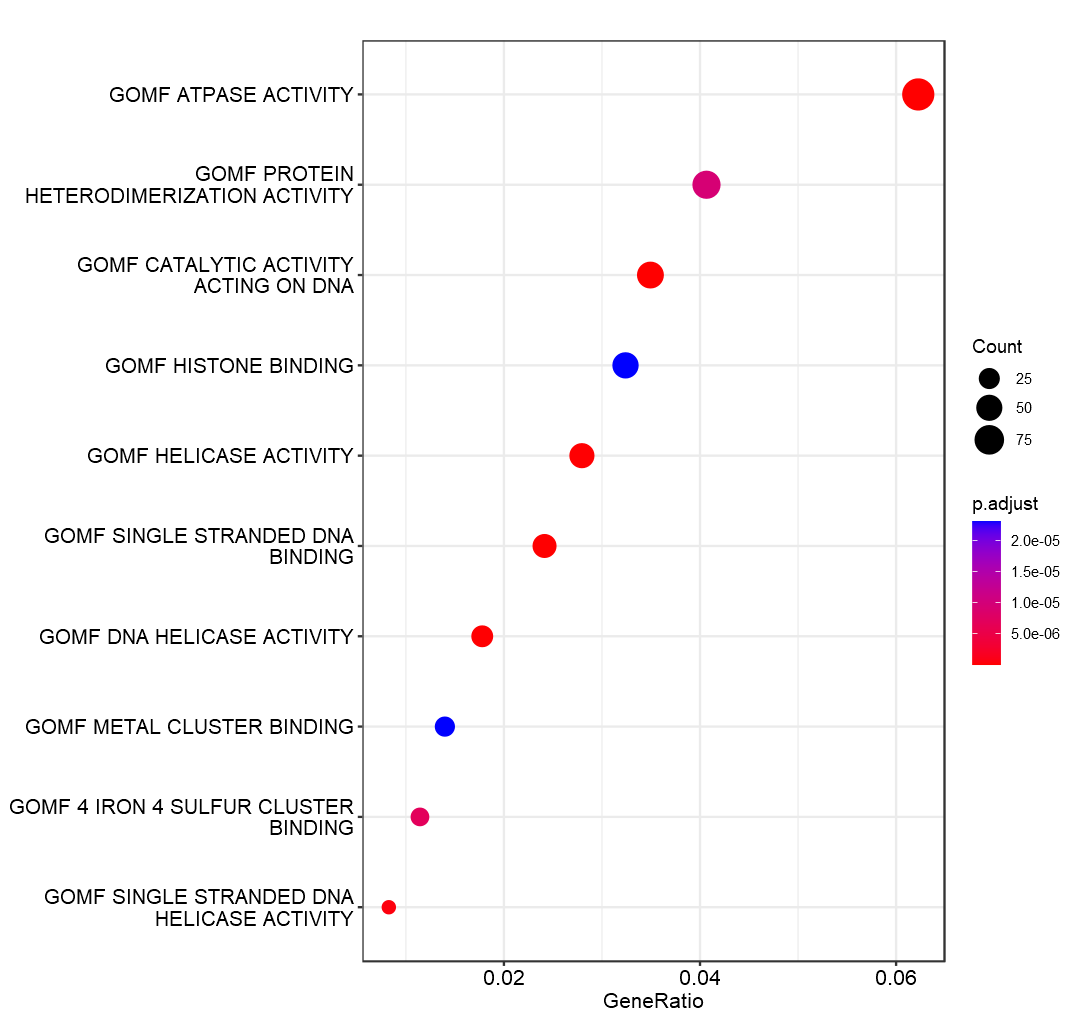

In [14]:
n_top_egmt <- 10
gg <- dotplot(em.bp, showCategory=n_top_egmt)
#gg <- dotplot(em, x = "GeneRatio",
#        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
#        title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_BP%d", condstr, n_top_egmt))


gg <- dotplot(em.cc, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_CC%d", condstr, n_top_egmt))

gg <- dotplot(em.mf, showCategory=n_top_egmt)
print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top_MF%d", condstr, n_top_egmt))

## This part is for the Hyunsoo style plot
### Modified by Nitish on 11/19/2021

<b>This approach have some pros and cons. </b><br>
<ol>
 <li>We loose some genes during HGNC symbol to ENTREZ ID mapping/conversion.</li>
 <li>Make separate table and plot for all GO categories.</li>
    <li>Use <b><em>enrichGO</b></em> function from Bioconductor package <b><em>DOSE</b></em> which is not updated like <b><em>mdigdbr</b></em>.</li>
</ol>

## rna_only up

In [15]:
condstr <- "sym_rna_only_up"
sym_rna_only_up <- intersect(sym_mrna_only, sym_mrna_up)
verb("sym_rna_only_up: %d\n", length(sym_rna_only_up))

################################################
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)
library(org.Mm.eg.db)

#entrez.id <- unique(entrezdf$entrez_id[ match(sym_rna_only_up, entrezdf$gene_name) ])
entrez.id <- bitr(sym_rna_only_up, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
                minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(egmt_rna_only_up)
dim(egmt_rna_only_up)

write.table(egmt_rna_only_up, file = sprintf('table/fig1.%s.go.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

sym_rna_only_up: 1874


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(sym_rna_only_up, fromType = "SYMBOL", toType = c("ENSEMBL", :
"0.64% of input gene IDs are fail to map..."


,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009100,BP,GO:0009100,glycoprotein metabolic process,73/1799,331/29008,1.002552e-21,5.610279e-18,4.160062e-18,Aatf/Abca2/Ago2/Alg1/Alg14/Alg5/B3galnt2/B3galt6/B3gat3/B4galt7/B4gat1/Bcl2/C1galt1c1/Chpf/Chpf2/Chst11/Chst12/Chst14/Chsy1/Csgalnact1/Dad1/Dpy19l1/Dse/Dsel/Edem1/Edem3/Eogt/Erp44/Ext2/Extl3/Fkrp/Fut8/Galnt1/Galnt3/Galnt7/Glce/Gxylt1/Hs2st1/Itm2c/Large1/Man1a2/Man1b1/Man2a2/Mgat2/Mgat4a/Mgat4b/Mgat5/Ndst1/Ndst2/Nus1/Ost4/Ostc/Plod3/Pmm1/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Porcn/Ppard/Psen1/Rxylt1/Srd5a3/St3gal2/St6gal1/Tmtc4/Ube2j1/Uggt1/Uggt2/Vangl2/Xxylt1/Xylt2,73
GO:0009101,BP,GO:0009101,glycoprotein biosynthetic process,64/1799,271/29008,7.392533e-21,2.068431e-17,1.533756e-17,Aatf/Abca2/Ago2/Alg1/Alg14/Alg5/B3galnt2/B3galt6/B3gat3/B4galt7/B4gat1/Bcl2/C1galt1c1/Chpf/Chpf2/Chst11/Chst12/Chst14/Chsy1/Csgalnact1/Dad1/Dpy19l1/Dse/Eogt/Ext2/Extl3/Fkrp/Fut8/Galnt1/Galnt3/Galnt7/Glce/Gxylt1/Hs2st1/Itm2c/Large1/Mgat2/Mgat4a/Mgat4b/Mgat5/Ndst1/Ndst2/Nus1/Ost4/Ostc/Plod3/Pmm1/Pofut1/Pofut2/Poglut1/Poglut3/Pomt2/Psen1/Rxylt1/Srd5a3/St3gal2/St6gal1/Tmtc4/Ube2j1/Uggt1/Uggt2/Vangl2/Xxylt1/Xylt2,64
GO:0048193,BP,GO:0048193,Golgi vesicle transport,61/1799,274/29008,1.374690e-18,2.564255e-15,1.901414e-15,Arf3/Arfgap3/Arl1/Atp2c1/Bet1/Bet1l/Chic2/Cnst/Csk/Cux1/Cyth3/Dnm2/Ergic2/Erp29/Exoc5/Exoc8/Gga3/Golga7/Gosr1/Gosr2/Htt/Hyou1/Ier3ip1/Kdelr3/Klhl20/Lman2l/Myo5a/Nbea/Nrbp1/Plpp3/Prepl/Prkci/Rab31/Rab34/Rab6b/Rnf139/Sar1a/Sec24c/Sgsm2/Slc10a7/Snx12/Spire1/Stx6/Tbc1d20/Tex261/Tmed10/Tmed2/Tmed3/Tmed5/Tmem115/Trappc2/Trappc3/Uso1/Vamp5/Vps29/Vti1a/Vti1b/Wipi1/Yif1b/Yipf5/Ykt6,61
GO:0043161,BP,GO:0043161,proteasome-mediated ubiquitin-dependent protein catabolic process,77/1799,423/29008,1.200323e-17,1.679252e-14,1.245177e-14,Agap3/Amfr/Ankrd9/Arel1/Arih1/Bfar/Cdc26/Cdc34/Chfr/Csnk1d/Csnk1e/Cul4a/Dcaf12/Dda1/Desi1/Dnajb12/Dnajb2/Dnajb9/Dvl1/Edem1/Edem3/Erlec1/Erlin1/Fbxl12/Fbxl17/Fbxl18/Fbxl2/Fbxl20/Fbxl3/Fbxo38/Fbxo9/Gabarap/Gba/Gipc1/Gna12/Hectd3/Hspa1b/Hspa5/Kctd17/Kctd5/Klhdc3/Klhl20/Maea/Man1b1/N4bp1/Nhlrc3/Nub1/Psen1/Psmd4/Rmnd5b/Rnf14/Rnf185/Rnf19a/Rnf34/Rnf4/Sec61b/Selenos/Siah1a/Siah2/Smurf2/Spop/Sumo1/Tmem129/Tnfaip1/Topors/Trim39/Ube2b/Ube2cbp/Ube2g2/Ube2j1/Ube2w/Wfs1/Wwp2/Wwtr1/Zfand2a/Znrf1/Zswim8,77
GO:0006914,BP,GO:0006914,autophagy,78/1799,437/29008,2.372467e-17,2.212721e-14,1.640748e-14,Arsa/Atg13/Atg14/Atg16l1/Bcl2/Bcl2l11/C9orf72/Cdc37/Cptp/Ctsa/Ctsd/Cttn/Dcaf12/Dnm1l/Ercc4/Fbxl2/Fez2/Flcn/Foxk2/Gabarap/Gba/Gpr137/Gpr137b/Gpsm1/Htra2/Htt/Ift20/Lamp2/Lix1l/Map1lc3a/Map1lc3b/Mcoln1/Mfn2/Mid2/Myo5a/Ormdl3/Pacs2/Pafah1b2/Phf23/Pik3cb/Pip4k2b/Plekhf1/Psen1/Rab12/Rab23/Rab43/Rab7/Ralb/Retreg1/Rmc1/Rnf185/Rnf41/Rock1/Rraga/Rragc/Rubcn/Scoc/Sh3bp4/Slc25a4/Smcr8/Snapin/Snx14/Tbc1d12/Tex264/Tigar/Tmem208/Tmem39a/Trim12c/Trp53inp2/Uba5/Ufm1/Ulk2/Vmp1/Vti1a/Vti1b/Wdfy3/Wipi1/Zfyve1,78
GO:0061919,BP,GO:0061919,process utilizing autophagic mechanism,78/1799,437/29008,2.372467e-17,2.212721e-14,1.640748e-14,Arsa/Atg13/Atg14/Atg16l1/Bcl2/Bcl2l11/C9orf72/Cdc37/Cptp/Ctsa/Ctsd/Cttn/Dcaf12/Dnm1l/Ercc4/Fbxl2/Fez2/Flcn/Foxk2/Gabarap/Gba/Gpr137/Gpr137b/Gpsm1/Htra2/Htt/Ift20/Lamp2/Lix1l/Map1lc3a/Map1lc3b/Mcoln1/Mfn2/Mid2/Myo5a/Ormdl3/Pacs2/Pafah1b2/Phf23/Pik3cb/Pip4k2b/Plekhf1/Psen1/Rab12/Rab23/Rab43/Rab7/Ralb/Retreg1/Rmc1/Rnf185/Rnf41/Rock1/Rraga/Rragc/Rubcn/Scoc/Sh3bp4/Slc25a4/Smcr8/Snapin/Snx14/Tbc1d12/Tex264/Tigar/Tmem208/Tmem39a/Trim12c/Trp53inp2/Uba5/Ufm1/Ulk2/Vmp1/Vti1a/Vti1b/Wdfy3/Wipi1/Zfyve1,78


[1] 1308   10

### KEGG pathway by using enrichKEGG

Reading KEGG annotation online:


Reading KEGG annotation online:




,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu00532,mmu00532,Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate,12/748,20/8943,7.235772e-09,1.824916e-06,1.419843e-06,B3galt6/B3gat3/B4galt7/Chpf/Chpf2/Chst11/Chst12/Chst14/Chsy1/Csgalnact1/Dse/Xylt2,12
mmu04130,mmu04130,SNARE interactions in vesicular transport,15/748,33/8943,1.482755e-08,1.824916e-06,1.419843e-06,Bet1/Bet1l/Gosr1/Gosr2/Snap23/Stx16/Stx1a/Stx2/Stx4a/Stx6/Stx8/Vamp5/Vti1a/Vti1b/Ykt6,15
mmu04141,mmu04141,Protein processing in endoplasmic reticulum,38/748,172/8943,1.831020e-08,1.824916e-06,1.419843e-06,Amfr/Bag2/Bak1/Bcl2/Dad1/Dnajb1/Dnajb11/Dnajb12/Dnajb2/Dnajc1/Dnajc3/Edem1/Edem3/Erlec1/Ern1/Erp29/Hspa1b/Hspa5/Hyou1/Man1a2/Man1b1/Map2k7/Mbtps1/Ppp1r15a/Rnf185/Sar1a/Sec24c/Sec61a1/Sec61b/Sec61g/Sec63/Selenos/Ube2d2a/Ube2g2/Ube2j1/Uggt1/Uggt2/Wfs1,38
mmu04142,mmu04142,Lysosome,32/748,135/8943,4.283573e-08,2.707909e-06,2.106840e-06,Abca2/Acp2/Ap1s2/Ap3m1/Ap3m2/Arsa/Atp6v0a2/Atp6v0b/Cd68/Cln5/Ctsa/Ctsb/Ctsd/Ctsf/Ctso/Entpd4/Fuca1/Gba/Gga3/Glb1/Hgsnat/Hyal2/Lamp2/Laptm4a/M6pr/Mcoln1/Naglu/Nagpa/Neu1/Scarb2/Sumf1/Tpp1,32
mmu05132,mmu05132,Salmonella infection,48/748,253/8943,4.528275e-08,2.707909e-06,2.106840e-06,Abi1/Actr1b/Actr2/Ahnak/Ahnak2/Arpc3/Arpc4/Arpc5/Bak1/Bcl2/Birc3/Cyth3/Cyth4/Dctn3/Dnm2/Dync1h1/Dync1li1/Dynlrb1/Dynlt3/Elmo1/Elmo2/Exoc5/Flnc/Ikbkb/Klc2/Klc3/Ly96/M6pr/Map2k3/Map2k7/Mapk11/Myc/Pik3ca/Pik3cb/Pkn1/Podxl/Rab5b/Rab7/Rab9/Rala/Rela/Snx33/Snx9/Tcf7l1/Tirap/Tradd/Traf6/Tubb2b,48
mmu04144,mmu04144,Endocytosis,50/748,273/8943,7.657449e-08,3.815962e-06,2.968941e-06,Acap3/Actr2/Agap1/Agap3/Arf3/Arfgap3/Arpc3/Arpc4/Arpc5/Asap1/Bin1/Chmp1b/Chmp3/Cyth3/Cyth4/Dnm2/Ehd4/Epn3/Git1/Grk6/Hgs/Hspa1b/Igf1r/Iqsec1/Mvb12b/Pard3/Pip5k1a/Pip5k1b/Pip5k1c/Prkci/Rab11fip3/Rab22a/Rab31/Rab5b/Rab7/Rnf41/Sh3kbp1/Smap1/Smurf2/Snx12/Snx32/Spg21/Src/Traf6/Vps29/Vps37a/Washc2/Washc4/Wipf1/Zfyve27,50


[1] 41  9

[1] TRUE

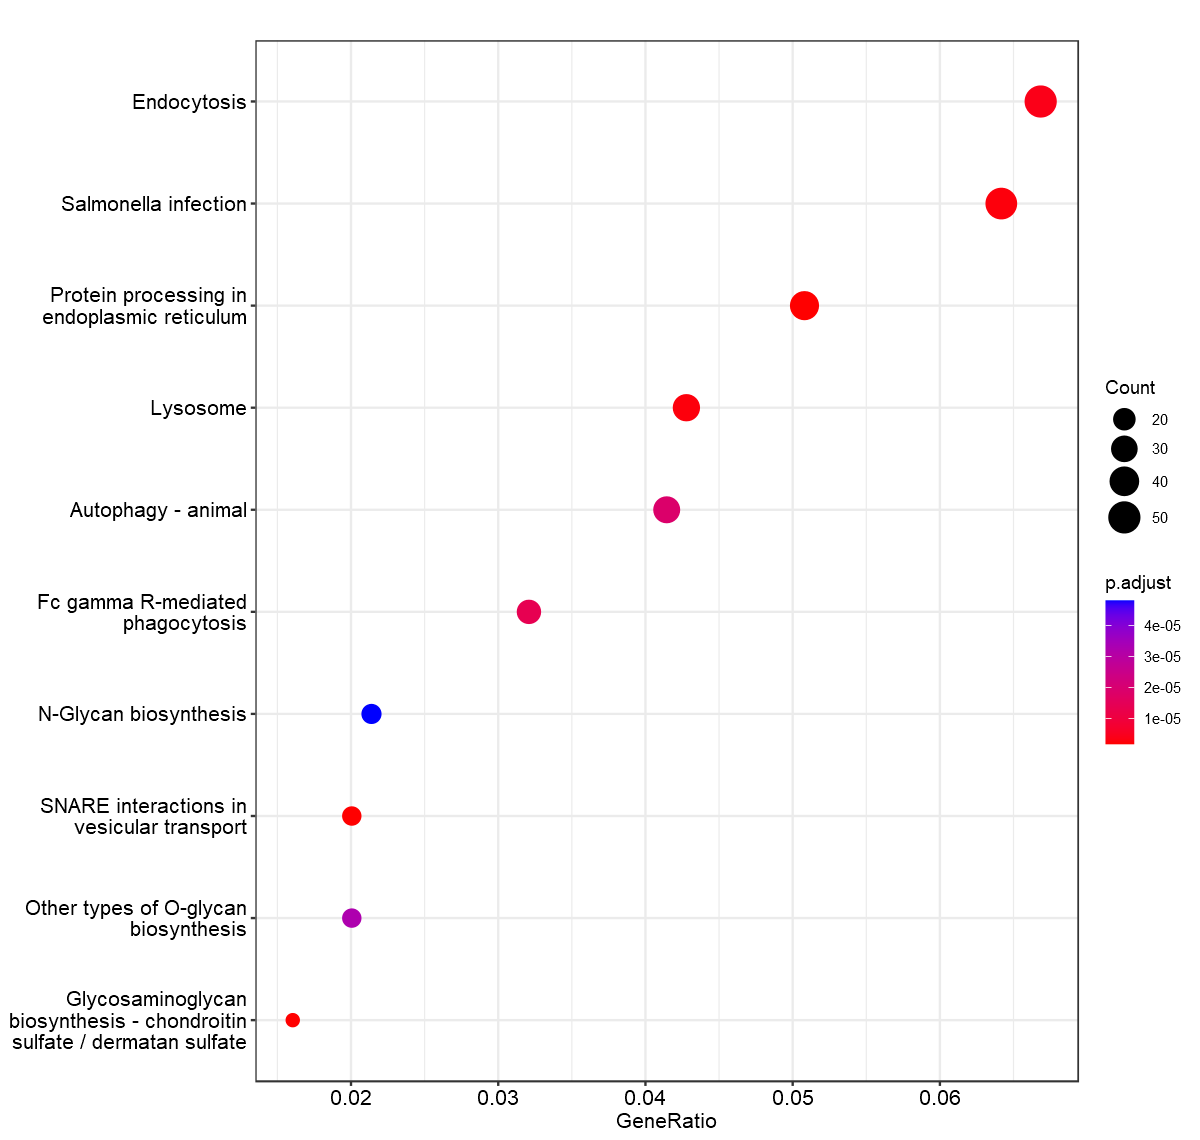

In [16]:
## Modified by Nitish on 12/03/2021
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", 
                 qvalueCutoff=0.1)
eKEGG_rna_only_up <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(eKEGG_rna_only_up)
dim(eKEGG_rna_only_up)
write.table(eKEGG_rna_only_up, file = sprintf('table/fig1.%s.KEGG.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
n_top_egmt <= 15
gg  <- dotplot(eKEGG_rna_only_up, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=10, height=9.5,
    file=sprintf("dotplot.%s.enrichKEGG_top%d", condstr, n_top_egmt))

### dotplot

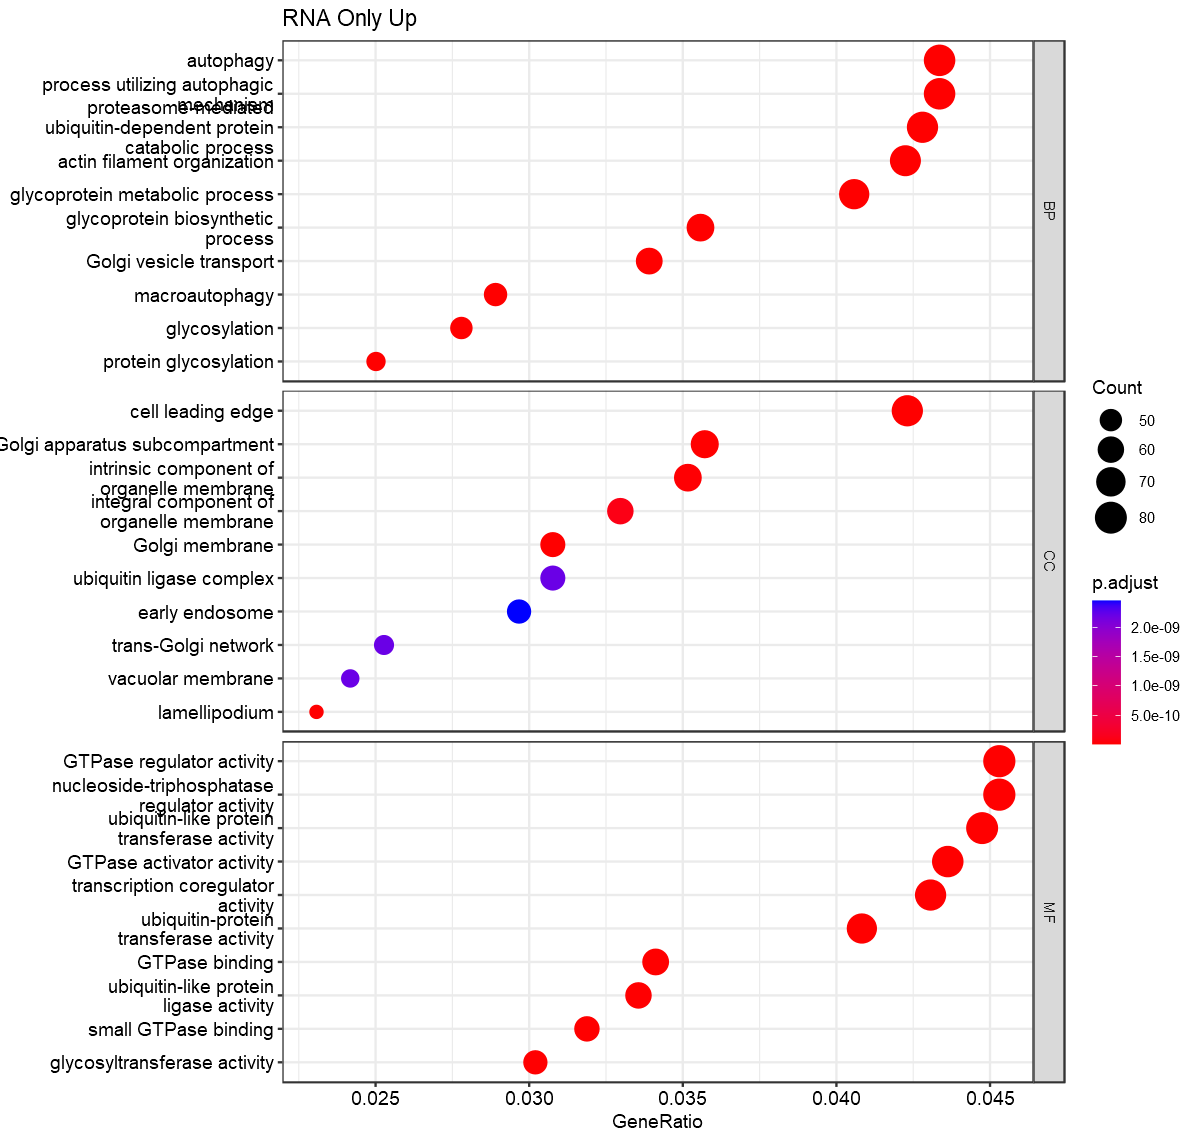

In [17]:
n_top_egmt <- 10
gg <- dotplot(egmt_rna_only_up, x = "GeneRatio",
        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
        title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=10, height=9.5,
    file=sprintf("dotplot.%s.enricher.go_top%d", condstr, n_top_egmt))

## rna_only down

In [18]:
condstr <- "sym_rna_only_dn"

sym_rna_only_dn <- intersect(sym_mrna_only, sym_mrna_dn)
verb("sym_rna_only_dn: %d\n", length(sym_rna_only_dn))
########################################################
library(clusterProfiler)
library(DOSE)

#entrez.id <- unique(entrezdf$entrez_id[ match(sym_rna_only_dn, entrezdf$gene_name) ])
entrez.id <- bitr(sym_rna_only_dn, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)

entrez.id <- entrez.id$ENTREZID

set.seed(40)
egmt_rna_only_dn <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
                minGSSize = 10, maxGSSize = 500)
egmt_rna_only_dn <- setReadable(egmt_rna_only_dn, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(egmt_rna_only_dn)
dim(egmt_rna_only_dn)

write.table(egmt_rna_only_dn, file = sprintf('table/fig1.%s.go.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

sym_rna_only_dn: 1971


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(sym_rna_only_dn, fromType = "SYMBOL", toType = c("ENSEMBL", :
"0.25% of input gene IDs are fail to map..."


,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006281,BP,GO:0006281,DNA repair,140/1887,495/29008,5.458855e-52,3.057505e-48,2.287547e-48,Actr5/Adprs/Apbb1/Ascc1/Atm/Aunip/Bard1/Blm/Brca2/Brip1/Cdc14b/Cdc45/Cdc5l/Cdca5/Cdkn2d/Cenpx/Chaf1a/Chaf1b/Chek1/Chek2/Cinp/Clspn/Commd1/Cyren/Dclre1a/Dclre1b/Ddx1/Ddx11/Dek/Dhx9/Dna2/Dtl/Eepd1/Egfr/Eme1/Eme2/Ercc5/Esco2/Exo1/Eya2/Faap24/Fan1/Fancd2/Fancf/Fanci/Fancl/Fen1/Foxm1/Fzr1/Gins2/Gtf2h2/Gtf2h4/H2aw/H2ax/Helb/Helq/Hmces/Hmgb1/Hus1/Ino80c/Ino80d/Ints3/Kif22/Kmt5b/Lig1/Mad2l2/Mcm3/Mcm5/Mcm7/Mcm8/Mdc1/Mlh1/Mlh3/Mms22l/Mre11a/Msh2/Msh6/Nono/Nop53/Nsd2/Nsmce1/Nsmce4a/Nthl1/Nucks1/Nudt1/Nudt16l1/Parp1/Pclaf/Pcna/Pds5b/Pml/Pms1/Pola1/Pold1/Pole/Pole2/Polh/Poll/Pttg1/Rad18/Rad21/Rad50/Rad51/Rad51c/Rbbp8/Recql/Recql4/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rnf168/Rpa2/Rtel1/Smarcal1/Smc1a/Smc2/Smc3/Smc4/Smchd1/Spidr/Spire2/Suv39h1/Tdg/Tdp1/Ticrr/Timeless/Tonsl/Topbp1/Trip13/Ube2t/Usp1/Usp10/Usp28/Usp3/Uvssa/Xrcc5/Xrcc6/Zfp365,140
GO:0007059,BP,GO:0007059,chromosome segregation,105/1887,338/29008,2.634357e-43,7.377518e-40,5.519672e-40,Anapc11/Anapc5/Anapc7/Atm/Aurkb/Birc5/Brca2/Brip1/Bub1/Bub1b/Cdc20/Cdca2/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpf/Cenpx/Chtf18/Ciao2a/Cit/Ctcf/Ddx11/Dlgap5/Dscc1/Dsn1/Ect2/Ehmt2/Eme1/Eme2/Esco2/Espl1/Fam83d/Fancd2/Fbxo5/Fen1/Haspin/Hjurp/Hnrnpu/Ik/Incenp/Kif18a/Kif18b/Kif22/Kif2c/Kifc5b/Knl1/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mcmbp/Mis18a/Mki67/Mlh1/Mlh3/Mre11a/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc1/Ndc80/Nek2/Nek6/Nsl1/Nup37/Nup43/Nusap1/Oip5/Pds5b/Plk1/Pmf1/Prc1/Psmg2/Pttg1/Racgap1/Rad18/Rad21/Rad51c/Rb1/Recql4/Sgo1/Sgo2a/Ska3/Smc1a/Smc2/Smc3/Smc4/Spag5/Spc24/Spc25/Spdl1/Tacc3/Top1/Top2a/Trip13/Ttk/Tubg1/Ube2c/Zw10/Zwilch,105
GO:0048285,BP,GO:0048285,organelle fission,126/1887,495/29008,1.745107e-41,3.258115e-38,2.437639e-38,Aaas/Anapc11/Anapc5/Anapc7/Aspm/Atm/Aurka/Aurkb/Birc5/Bmp4/Bmp7/Bnip3/Brca2/Brip1/Bub1/Bub1b/Ccnb2/Cdc14a/Cdc14b/Cdc20/Cdc25b/Cdca2/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpx/Chek1/Chek2/Chtf18/Cit/Cks2/Dhodh/Dscc1/Dsn1/Ehmt2/Eme1/Eme2/Eps8/Espl1/Fancd2/Fbxo5/Fgfr3/Fzr1/Haspin/Hnrnpu/Ik/Incenp/Ing2/Kif11/Kif18a/Kif18b/Kif20b/Kif22/Kif2c/Kifc1/Kifc5b/Knstrn/Kntc1/Lpin1/Macroh2a1/Mad2l1/Mapt/Mastl/Mfn1/Mki67/Mlh1/Mlh3/Mre11a/Mtbp/Mybl2/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc1/Ndc80/Nek2/Nek6/Nme6/Nsfl1c/Nsl1/Nusap1/Pds5b/Pex11a/Pex11g/Plk1/Ppargc1a/Ppp2r2b/Prc1/Psmg2/Pttg1/Racgap1/Rad21/Rad51/Rad51c/Rb1/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Spdl1/Spire2/Suv39h2/Tacc3/Tdrkh/Tmem135/Tom1l1/Top2a/Topbp1/Tpx2/Trip13/Ttk/Tubg1/Ube2c/Vps35/Washc1/Zscan21/Zw10/Zwilch,126
GO:0000280,BP,GO:0000280,nuclear division,115/1887,442/29008,6.392193e-39,8.950668e-36,6.696663e-36,Aaas/Anapc11/Anapc5/Anapc7/Aspm/Atm/Aurka/Aurkb/Birc5/Bmp4/Bmp7/Brca2/Brip1/Bub1/Bub1b/Ccnb2/Cdc14a/Cdc14b/Cdc20/Cdc25b/Cdca2/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cenpx/Chek1/Chek2/Chtf18/Cit/Cks2/Dscc1/Dsn1/Ehmt2/Eme1/Eme2/Eps8/Espl1/Fancd2/Fbxo5/Fgfr3/Fzr1/Haspin/Hnrnpu/Ik/Incenp/Ing2/Kif11/Kif18a/Kif18b/Kif20b/Kif22/Kif2c/Kifc1/Kifc5b/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mastl/Mki67/Mlh1/Mlh3/Mre11a/Mtbp/Mybl2/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc1/Ndc80/Nek2/Nek6/Nme6/Nsfl1c/Nsl1/Nusap1/Pds5b/Plk1/Prc1/Psmg2/Pttg1/Racgap1/Rad21/Rad51/Rad51c/Rb1/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Spdl1/Spire2/Suv39h2/Tacc3/Tdrkh/Tom1l1/Top2a/Topbp1/Tpx2/Trip13/Ttk/Tubg1/Ube2c/Washc1/Zscan21/Zw10/Zwilch,115
GO:0000819,BP,GO:0000819,sister chromatid segregation,74/1887,188/29008,8.580420e-39,9.611787e-36,7.191295e-36,Anapc11/Anapc5/Anapc7/Atm/Aurkb/Birc5/Bub1/Bub1b/Cdc20/Cdca5/Cdca8/Cdk5rap2/Cdt1/Cenpe/Cit/Ddx11/Dscc1/Dsn1/Esco2/Espl1/Fbxo5/Fen1/Haspin/Hnrnpu/Ik/Incenp/Kif18a/Kif18b/Kif22/Kif2c/Kifc5b/Knstrn/Kntc1/Macroh2a1/Mad2l1/Mcmbp/Mre11a/Ncapd2/Ncapd3/Ncapg/Ncapg2/Ncaph/Ncaph2/Ndc80/Nek2/Nek6/Nsl1/Nusap1/Pds5b/Plk1/Prc1/Psmg2/Pttg1/Racgap1/Rad21/Rad51c/Rb1/Recql4/Sgo1/Sgo2a/Smc1a/Smc2/Smc3/Smc4/Spag5/Spdl1/Tacc3/Top2a/T

[1] 1479   10

### KEGG pathway by using enrichKEGG

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
mmu04110,mmu04110,Cell cycle,47/878,125/8943,4.823761e-17,1.538780e-14,1.299877e-14,Anapc11/Anapc5/Anapc7/Atm/Bub1/Bub1b/Ccna2/Ccnb2/Ccnd3/Cdc14a/Cdc14b/Cdc20/Cdc25b/Cdc25c/Cdc45/Cdk1/Cdk4/Cdk6/Cdkn2a/Cdkn2d/Chek1/Chek2/Dbf4/Ep300/Espl1/Fzr1/Mad2l1/Mad2l2/Mcm3/Mcm5/Mcm7/Orc3/Orc5/Pcna/Pkmyt1/Plk1/Pttg1/Rad21/Rb1/Rbl1/Skp2/Smad3/Smc1a/Smc3/Tfdp2/Ttk/Ywhaq,47
mmu03030,mmu03030,DNA replication,20/878,35/8943,4.378333e-12,6.983441e-10,5.899228e-10,Dna2/Fen1/Lig1/Mcm3/Mcm5/Mcm7/Pcna/Pola1/Pola2/Pold1/Pole/Pole2/Prim2/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rnaseh2c/Rpa2,20
mmu03040,mmu03040,Spliceosome,41/878,134/8943,1.305478e-11,1.388158e-09,1.172640e-09,Acin1/Alyref/Aqr/Cdc40/Cdc5l/Ddx39b/Ddx46/Ddx5/Eif4a3/Hnrnpa3/Hnrnpc/Hnrnpk/Hnrnpm/Hnrnpu/Isy1/Lsm2/Lsm3/Lsm5/Magohb/Pcbp1/Phf5a/Plrg1/Ppil1/Pqbp1/Prpf3/Prpf38a/Prpf8/Rbmx/Sf3a2/Sf3a3/Sf3b1/Sf3b3/Snrnp200/Snrnp40/Snw1/Srsf1/Tcerg1/Thoc2/Tra2b/U2af2/U2surp,41
mmu05322,mmu05322,Systemic lupus erythematosus,42/878,148/8943,1.081056e-10,8.621420e-09,7.282903e-09,C1ra/C3/H2ac10/H2ac12/H2ac13/H2ac15/H2ac18/H2ac21/H2ac22/H2ac4/H2ac6/H2ac7/H2ac8/H2aj/H2aw/H2ax/H2az2/H2bc12/H2bc13/H2bc14/H2bc21/H2bc22/H2bc3/H2bc8/H2bc9/H2bu2/H3c10/H3c11/H3c2/H3c4/H3c6/H3c8/H3f3a/H4c1/H4c11/H4c12/H4c2/H4c3/H4c4/H4c9/Macroh2a1/Macroh2a2,42
mmu03430,mmu03430,Mismatch repair,14/878,22/8943,1.056165e-09,6.738333e-08,5.692174e-08,Exo1/Lig1/Mlh1/Mlh3/Msh2/Msh6/Pcna/Pold1/Rfc1/Rfc2/Rfc3/Rfc4/Rfc5/Rpa2,14
mmu00280,mmu00280,"Valine, leucine and isoleucine degradation",22/878,57/8943,6.344181e-09,2.928949e-07,2.474215e-07,Acaa1a/Acaa1b/Acaa2/Acat1/Acat2/Acsf3/Aldh3a2/Aldh6a1/Aldh9a1/Auh/Bcat2/Bckdhb/Dld/Hadha/Hibadh/Hmgcl/Ivd/Mccc1/Mcee/Mmut/Pcca/Pccb,22


[1] 44  9

[1] TRUE

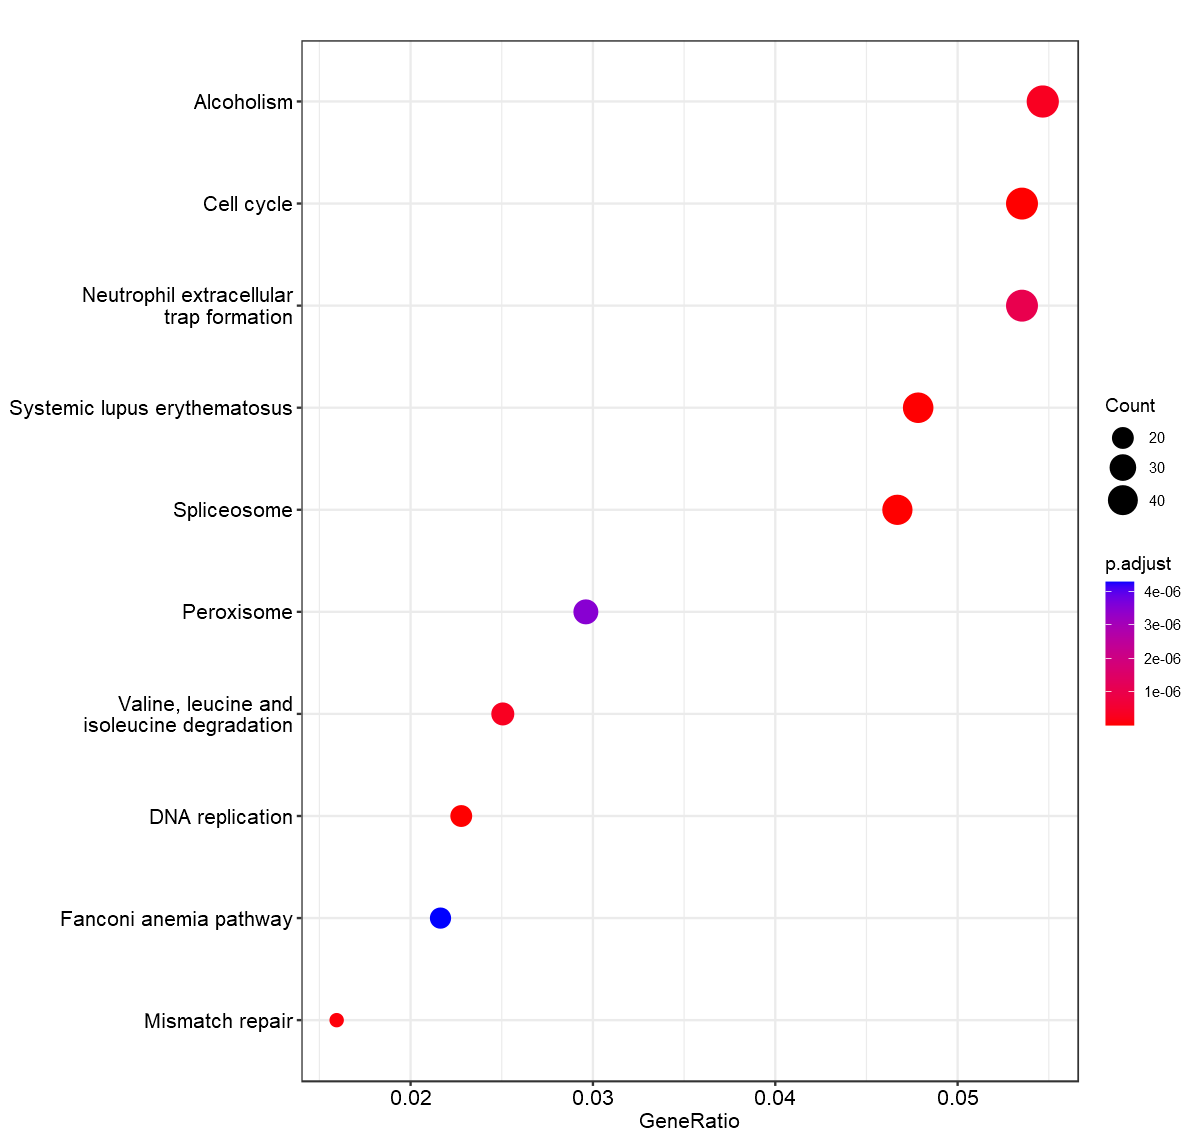

In [19]:
kk <- enrichKEGG(entrez.id, organism="mouse", pvalueCutoff=0.05, pAdjustMethod="BH", 
                 qvalueCutoff=0.1)
eKEGG_rna_only_dn <- setReadable(kk, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(eKEGG_rna_only_dn)
dim(eKEGG_rna_only_dn)
write.table(eKEGG_rna_only_dn, file = sprintf('table/fig1.%s.KEGG.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )
n_top_egmt <= 15
gg  <- dotplot(eKEGG_rna_only_dn, color = "p.adjust", showCategory = n_top_egmt)
print_figure(gg, width=10, height=9.5,
    file=sprintf("dotplot.%s.enrichKEGG_top%d", condstr, n_top_egmt))

### dotplot

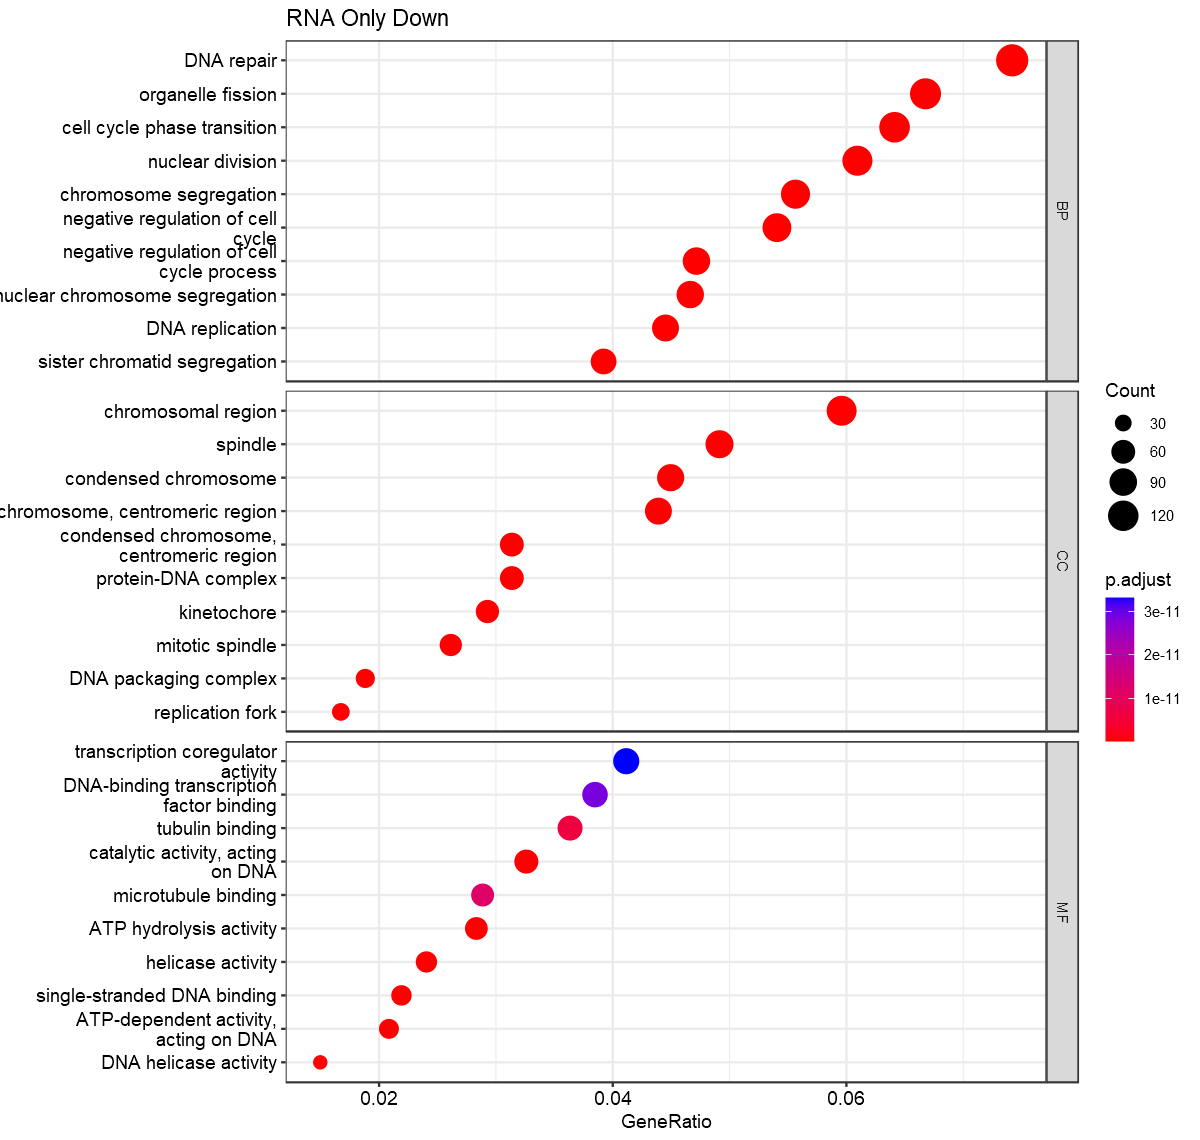

In [20]:
n_top_egmt <- 10
gg <- dotplot(egmt_rna_only_dn, x = "GeneRatio",
        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
        title = "RNA Only Down") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=10, height=9.5,
    file=sprintf("dotplot.%s.enricher.go_top%d", condstr, n_top_egmt))
